# Práctica Final Machine Learning 2024

## Importación de librerías

Empiezo instalando e importando las librerías necesarias

In [1]:
%pip install -r requirements.txt

Processing c:\b\abs_1c1a_vjay2\croot\aiobotocore_1682537737724\work (from -r requirements.txt (line 2))
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\b\\abs_1c1a_vjay2\\croot\\aiobotocore_1682537737724\\work'



In [2]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install xgboost
# %pip install tensorflow
# %pip install keras
# %pip install torch
# %pip install optuna
# %pip install ipython
# %pip install imbalanced-learn
# %pip install cuda-python
# %pip install cupy-cuda12x

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, davies_bouldin_score, silhouette_score, calinski_harabasz_score, balanced_accuracy_score
from sklearn.cluster import HDBSCAN
from sklearn.decomposition import PCA
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import optuna
import joblib
import gc
import logging
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SelectFromModel

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## EDA

Empiezo cargando mi set de datos

In [4]:
df = pd.read_csv('./caso_final_small_20k_con_mes.csv')

Muestro algunos datos para poder ver como es el dataset

In [5]:
df.head()

MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901    232.121597                    10.186000           0.000000   
1  201911  18280.292969                    32.005001          26.450001   
2  201906   2141.692810                    37.442001          31.400000   
3  202006   3181.986496                    20.001000          16.530000   
4  202001  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES  EDAD  \
0                                  28.0    232.121597  39.0   
1                                  49.0  18280.292969  25.0   
2                                   0.0   2141.692810  47.0   
3                                   0.0   3181.986496  43.0   
4                                 151.0  25626.083984  40.0   

   NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  \
0                     54.0  ...                   21.683399                0   
1                    152.0  ...                  166.050007              435   
2                      4.0  ...                  108.850102                0   
3                      0.0  ...                   65.799899                0   
4                    329.0  ...                  519.683305                1   

   KPI_IMPUESTOS  NUM_DESACTIVACIONES  PORCENTAJE_SEGUNDOS_RED_PROPIA  \
0       1.767800                    0                           100.0   
1       5.555000                    0                           100.0   
2       2.042002                    0                           100.0   
3       3.471001                    0                           100.0   
4       5.555000                    0                           100.0   

   SERVICIOS_TOTALES_MARCA  SERVICIOS_TOTALES_POSPAGO  MINUTOS_LLAMADAS_MOVIL  \
0                        2                          1                     0.0   
1                        1                          2                     0.0   
2                        2                          2                     0.0   
3                        2                          3                     0.0   
4                        1                          1                     0.0   

   PENETRACION_FIJO_ZONA  TARGET  
0               0.264612       0  
1               0.380171       0  
2               0.156041       0  
3               0.228810       1  
4               0.210286       1  

[5 rows x 36 columns]

Hago un análisis descriptivo de las variables

In [6]:
df.describe()

MES     MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  \
count   20000.000000   19741.000000                 19924.000000   
mean   201948.470400   12307.320625                    40.939452   
std        49.255692   20115.499610                    30.326117   
min    201901.000000       0.000000                    -0.002000   
25%    201905.000000    1929.673340                    24.999000   
50%    201911.000000    5931.522949                    33.004000   
75%    202005.000000   16013.454310                    50.124250   
max    202011.000000  853613.593750                  1246.438000   

       FACTURACION_CUOTA  SEGUNDOS_LLAMADA_RED_PROPIA  \
count       19924.000000                 19843.000000   
mean           25.179305                 19282.843471   
std            13.067181                 31773.406451   
min             0.000000                     0.000000   
25%            15.700000                  1777.000000   
50%            23.969999                  8011.000000   
75%            26.460000                 23009.500000   
max           133.890000                584239.000000   

       SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
count                          19843.000000   
mean                           10334.947941   
std                            18971.928733   
min                                0.000000   
25%                              705.500000   
50%                             3631.000000   
75%                            11846.500000   
max                           422724.000000   

       SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA   MB_MENSUALES          EDAD  \
count                          19843.000000   19749.000000  19971.000000   
mean                              62.941239   12288.026161     43.990937   
std                               93.528782   20112.795794     14.125926   
min                                0.000000       0.000000     17.000000   
25%                               11.000000    1915.529785     33.000000   
50%                               36.000000    5898.413086     43.000000   
75%                               82.000000   15967.201660     54.000000   
max                             6220.000000  853613.593750     98.000000   

       NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  \
count             19843.000000  ...                19749.000000   
mean                156.408456  ...                  361.817034   
std                 227.913588  ...                  543.391221   
min                   0.000000  ...                    0.000000   
25%                  29.000000  ...                   64.999998   
50%                  87.000000  ...                  178.966798   
75%                 199.000000  ...                  443.583287   
max               12497.000000  ...                12316.250395   

       NUM_DIAS_BUNDLE  KPI_IMPUESTOS  NUM_DESACTIVACIONES  \
count     20000.000000   19924.000000          20000.00000   
mean        148.792200       5.657482              0.00785   
std         476.199046       3.552509              0.10435   
min           0.000000      -1.190000              0.00000   
25%           0.000000       3.297000              0.00000   
50%           1.000000       5.034000              0.00000   
75%           2.000000       6.768002              0.00000   
max        4056.000000      93.483509              4.00000   

       PORCENTAJE_SEGUNDOS_RED_PROPIA  SERVICIOS_TOTALES_MARCA  \
count                    19737.000000             20000.000000   
mean                        99.975217                 1.432750   
std                          1.284268                 0.756972   
min                          0.000000                 1.000000   
25%                        100.000000                 1.000000   
50%                        100.000000                 1.000000   
75%                        100.000000                 2.000000   
max                        100.000000                 8.000000   

       SERVICIOS_TOTALE

Y veo los tipos de variables que tengo y cuántos registros tengo de cada

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

Para ver los nulos con más precisión, hago la siguiente función y veo cuántos hay por columna

In [8]:
df.isnull().sum()

MES                                        0
MB_TOTALES                               259
FACTURACION_TOTAL_IMPUESTOS               76
FACTURACION_CUOTA                         76
SEGUNDOS_LLAMADA_RED_PROPIA              157
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA     157
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     157
MB_MENSUALES                             251
EDAD                                      29
NUM_LLAMADAS_RED_PROPIA                  157
FACTURACION_TOTAL_SIN_IMPUESTOS           76
NUM_LINEAS_PRIN_POSPAGO                    0
NUM_LINEAS_POSPAGO                         0
NUM_LINEAS_FIJAS                           0
NUM_DIAS_CONVERGENTE                       0
NUM_LINEAS_FIJAS_POSPAGO                   0
NUM_SERVICIOS_POSPAGO                      0
DIAS_PRIMERA_CUENTA                        0
NUM_CANCELACIONES                          0
LLAMADAS_MOVILES                          82
NUM_LINEAS_POSPAGO_TOTAL                   0
TERMINO_FACTURACION                       76
NUM_DESACT

Hago un pequeño gráfico para ver la distribución

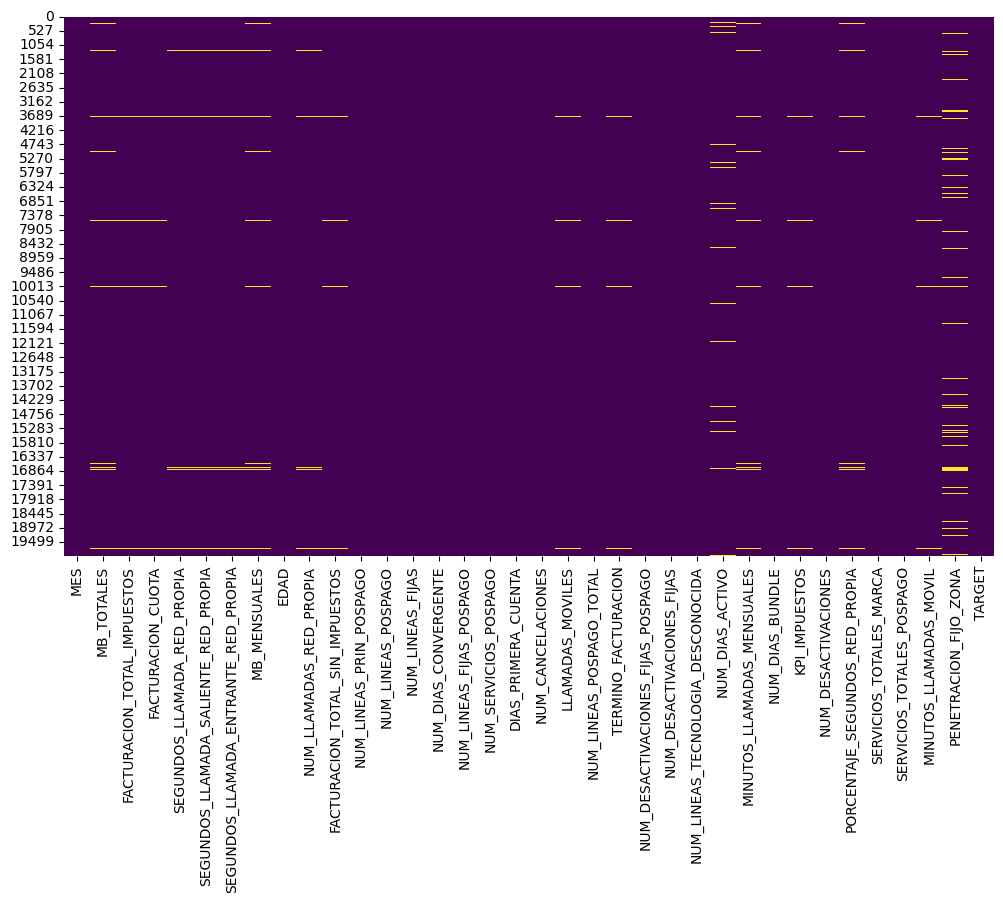

In [9]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

Para ver cuántos outliers tiene cada columna me creo una función y muestro el diccionario resultante

In [10]:
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
    return outliers

outliers = detect_outliers(df)
outliers

{'MES': 0,
 'MB_TOTALES': 1291,
 'FACTURACION_TOTAL_IMPUESTOS': 1037,
 'FACTURACION_CUOTA': 1791,
 'SEGUNDOS_LLAMADA_RED_PROPIA': 1807,
 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA': 1906,
 'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA': 1342,
 'MB_MENSUALES': 1298,
 'EDAD': 40,
 'NUM_LLAMADAS_RED_PROPIA': 1425,
 'FACTURACION_TOTAL_SIN_IMPUESTOS': 1010,
 'NUM_LINEAS_PRIN_POSPAGO': 2675,
 'NUM_LINEAS_POSPAGO': 423,
 'NUM_LINEAS_FIJAS': 21,
 'NUM_DIAS_CONVERGENTE': 654,
 'NUM_LINEAS_FIJAS_POSPAGO': 21,
 'NUM_SERVICIOS_POSPAGO': 423,
 'DIAS_PRIMERA_CUENTA': 101,
 'NUM_CANCELACIONES': 1475,
 'LLAMADAS_MOVILES': 42,
 'NUM_LINEAS_POSPAGO_TOTAL': 1966,
 'TERMINO_FACTURACION': 2446,
 'NUM_DESACTIVACIONES_FIJAS_POSPAGO': 47,
 'NUM_DESACTIVACIONES_FIJAS': 47,
 'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA': 423,
 'NUM_DIAS_ACTIVO': 125,
 'MINUTOS_LLAMADAS_MENSUALES': 1589,
 'NUM_DIAS_BUNDLE': 3133,
 'KPI_IMPUESTOS': 988,
 'NUM_DESACTIVACIONES': 132,
 'PORCENTAJE_SEGUNDOS_RED_PROPIA': 30,
 'SERVICIOS_TOTALES_MARCA': 545,

Voy a mostrar la matriz de correlación de las variables para saber con qué me encuentro

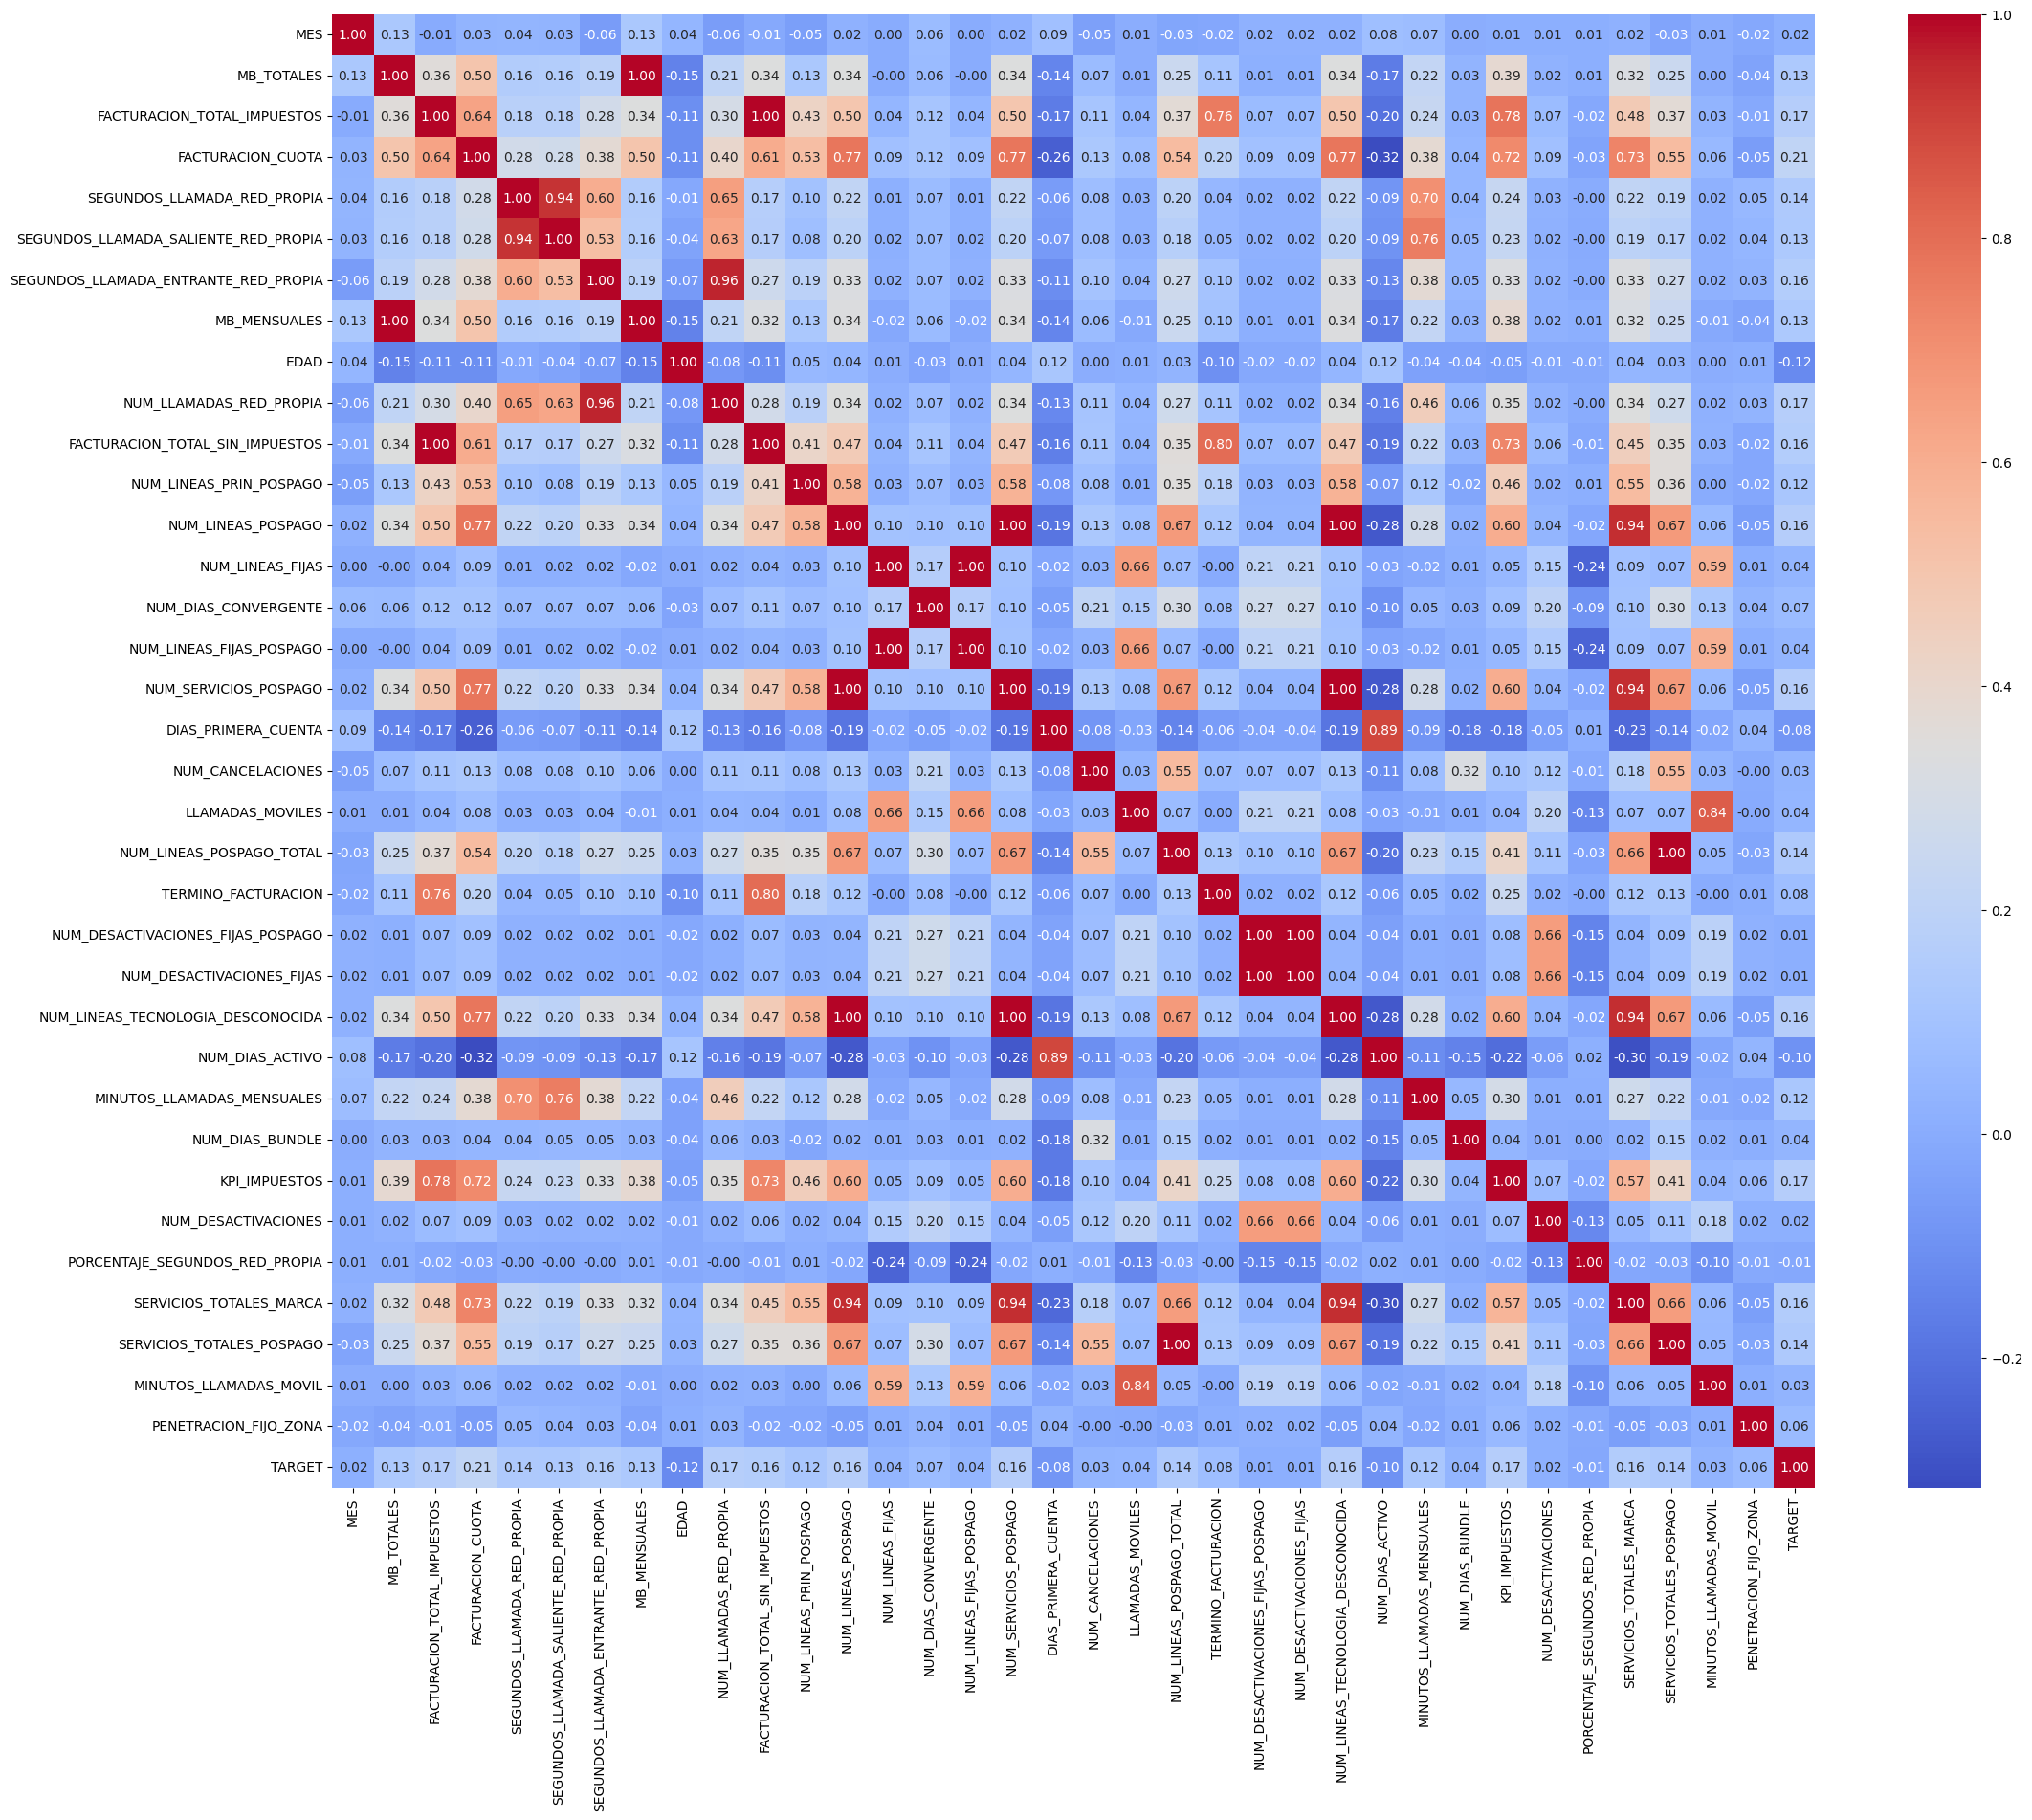

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Y finalmente voy a hacer un histograma de las variables del dataframe

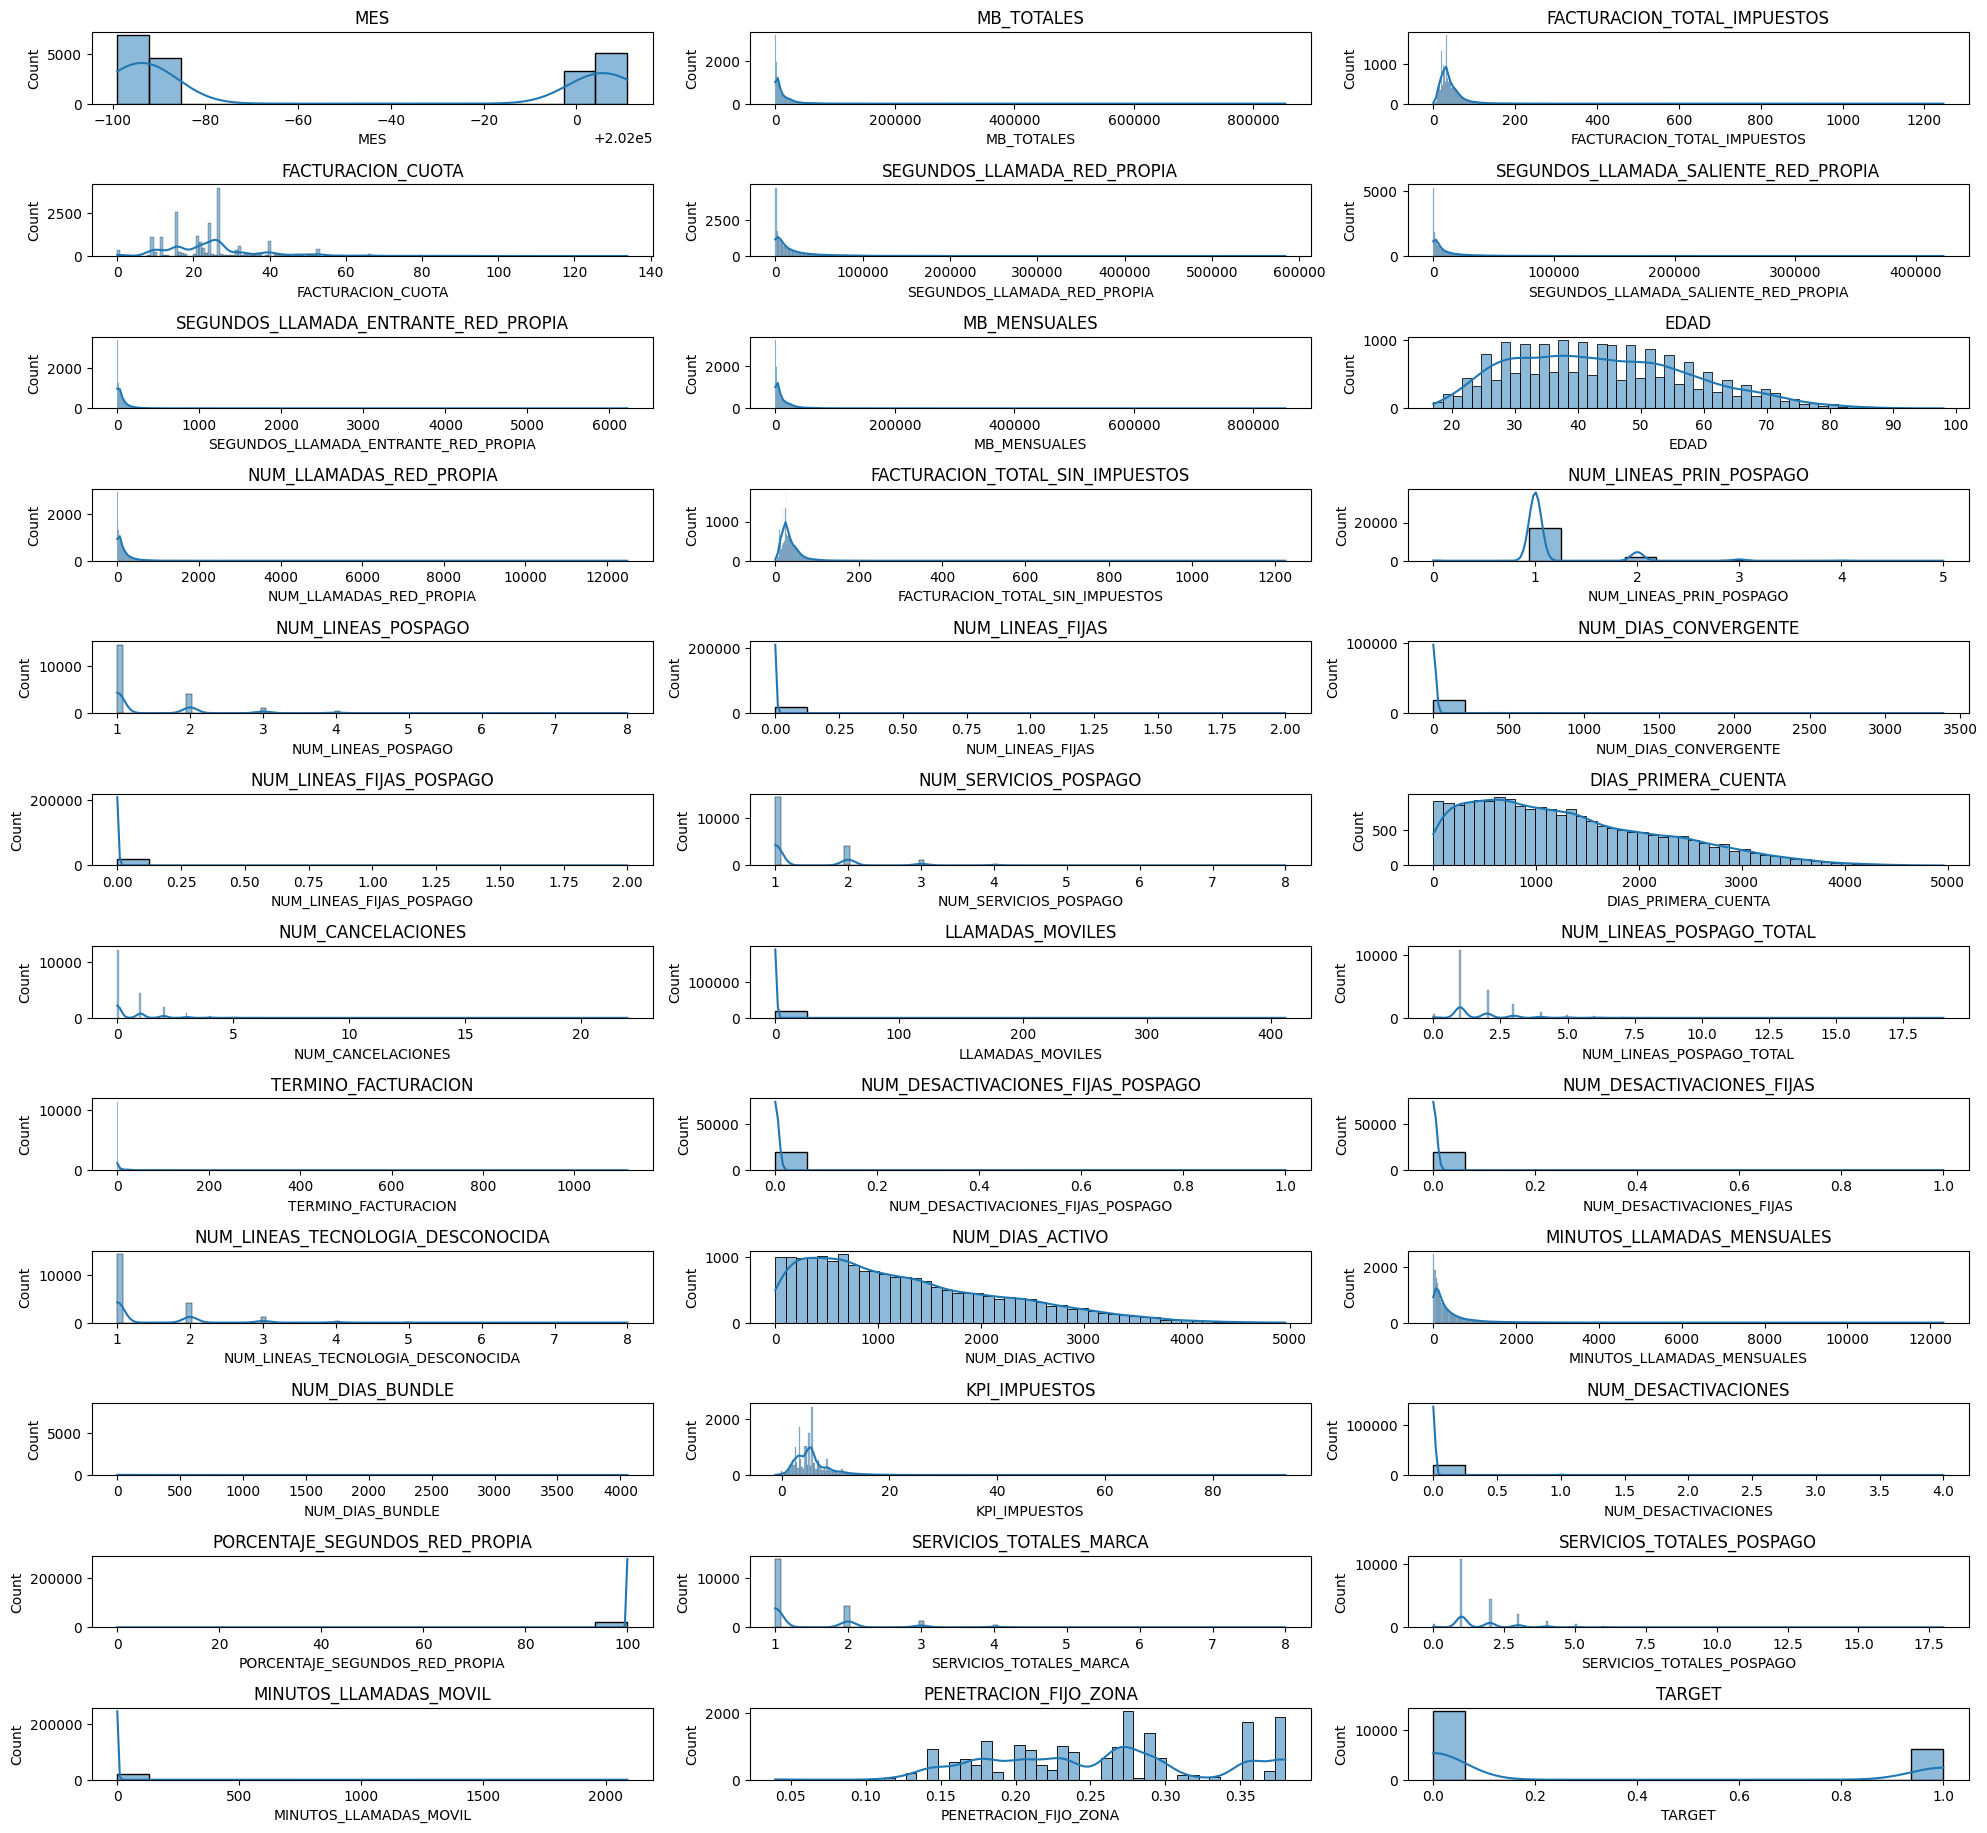

In [12]:
variables = df.columns
ax, fig = plt.subplots(figsize=(20, 35), nrows=23, ncols=3)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

### Detección de variables más importantes

Bien, de algo que he podido darme cuenta es que hay varias variables las cuales la mayoría de sus valores son 0, voy a convertir estas variables en categóricas de manera que si tiene más de un 90% de 0 y tiene menos de 10 valores únicos, la convierto en categórica de manera que si tiene valor 0 será 0 y si es distinto de 0 será 1

In [13]:
def clean_and_convert(df):
    for column in df.columns:
        null_count = df[column].isnull().sum()
        total_count = df.shape[0]

        if (df[column] == 0).sum() > 0.9 * total_count and column != 'TARGET':
            df[column] = df[column].apply(lambda x: 0 if x == 0 or x==np.nan else 1)
            if 'NUM' in column:
                new_column_name = column.replace('NUM_', '')
                df.rename(columns={column: new_column_name}, inplace=True)
    
    return df

df = clean_and_convert(df)
df.head()

MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0  201901    232.121597                    10.186000           0.000000   
1  201911  18280.292969                    32.005001          26.450001   
2  201906   2141.692810                    37.442001          31.400000   
3  202006   3181.986496                    20.001000          16.530000   
4  202001  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES  EDAD  \
0                                  28.0    232.121597  39.0   
1                                  49.0  18280.292969  25.0   
2                                   0.0   2141.692810  47.0   
3                                   0.0   3181.986496  43.0   
4                                 151.0  25626.083984  40.0   

   NUM_LLAMADAS_RED_PROPIA  ...  MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  \
0                     54.0  ...                   21.683399                0   
1                    152.0  ...                  166.050007              435   
2                      4.0  ...                  108.850102                0   
3                      0.0  ...                   65.799899                0   
4                    329.0  ...                  519.683305                1   

   KPI_IMPUESTOS  DESACTIVACIONES  PORCENTAJE_SEGUNDOS_RED_PROPIA  \
0       1.767800                0                           100.0   
1       5.555000                0                           100.0   
2       2.042002                0                           100.0   
3       3.471001                0                           100.0   
4       5.555000                0                           100.0   

   SERVICIOS_TOTALES_MARCA  SERVICIOS_TOTALES_POSPAGO  MINUTOS_LLAMADAS_MOVIL  \
0                        2                          1                       0   
1                        1                          2                       0   
2                        2                          2                       0   
3                        2                          3                       0   
4                        1                          1                       0   

   PENETRACION_FIJO_ZONA  TARGET  
0               0.264612       0  
1               0.380171       0  
2               0.156041       0  
3               0.228810       1  
4               0.210286       1  

[5 rows x 36 columns]

Aquí saco el mes propiamente dicho y el año de la columna "MES", después la columna "MES" la elimino

In [14]:
df['MES'] = pd.to_datetime(df['MES'], format='%Y%m')

df['MES_AÑO'] = df['MES'].dt.year
df['MES_MES'] = df['MES'].dt.month

df = df.drop('MES', axis=1)

### Encontrar variables más importantes

Voy a hacer esto con un árbol de decisión y para ello, primero he de escalarlas adecuadamente (esto lo he hecho directamente en una celda, pero a la hora de explicarlo he decidido partirlo en distintas celdas para una mejor explicación)

Primero divido el dataset en variable dependiente y variables independientes X e y

In [15]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

Ahora escalo los meses de esta manera, esto lo hago por ser los meses un dato cíclico. En cuanto a los años, he decidido hacer que sean una variable categórica y tener solo el 2020 siendo verdadero o falso

In [16]:
X['MES_SIN'] = np.sin(2 * np.pi * X['MES_MES'] / 12)
X['MES_COS'] = np.cos(2 * np.pi * X['MES_MES'] / 12)
mes_anio = pd.get_dummies(X['MES_AÑO'], drop_first=True)


Uno de nuevo los datos temporales escalados a X

In [17]:
X = pd.concat([X, mes_anio], axis=1)
X = X.drop(['MES_MES', 'MES_AÑO'], axis=1)

Divido el dataset en entrenamiento y prueba

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

Ahora, para poder escalarlo, saco las variables categóricas y las no categóricas

In [19]:
categorical_cols = X_train.select_dtypes(include=['category', 'bool', 'object']).columns
non_categorical_cols = X_train.select_dtypes(exclude=['category', 'bool']).columns

Y escalo las no categóricas

In [20]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [21]:
X_train_scaled[non_categorical_cols] = scaler.fit_transform(X_train[non_categorical_cols])
X_test_scaled[non_categorical_cols] = scaler.transform(X_test[non_categorical_cols])

Vuelvo a unir las categóricas con las no categóricas

In [22]:
X_train_final = pd.concat([X_train_scaled[non_categorical_cols], X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled[non_categorical_cols], X_test[categorical_cols]], axis=1)

Y extraigo los valores para que no haya problemas

In [23]:
X_train_final = X_train_final.values
X_test_final = X_test_final.values

Para ver cuáles son las mejores variables, primero entreno un RandomForest, del que extraeré las variables más importantes

In [24]:
rf = RandomForestClassifier(n_estimators=7000, random_state=42, n_jobs=8)
rf.fit(X_train_final, y_train)

RandomForestClassifier(n_estimators=7000, n_jobs=8, random_state=42)

Aquí hago una pequeña evaluación del modelo

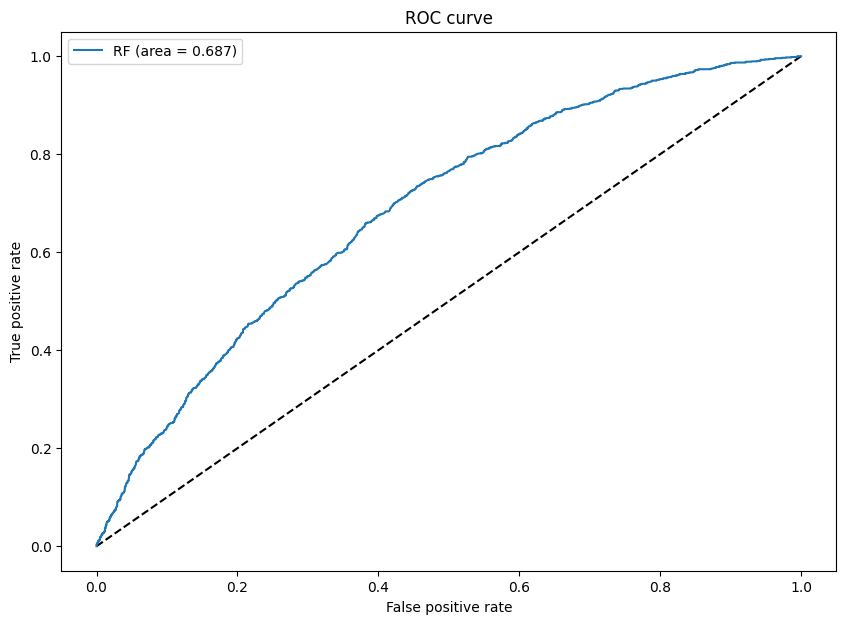

In [25]:
y_pred_rf = rf.predict_proba(X_test_final)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(roc_auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Y con la clase <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html">SelectFromModel</a> veo cuáles han sido las variables más importantes para el modelo

In [26]:
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_train_final, y_train)

selected_features = X_train.columns[sfm.get_support()]

selected_features

Index(['MB_TOTALES', 'FACTURACION_TOTAL_IMPUESTOS', 'FACTURACION_CUOTA',
       'SEGUNDOS_LLAMADA_RED_PROPIA', 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
       'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA', 'MB_MENSUALES', 'EDAD',
       'NUM_LLAMADAS_RED_PROPIA', 'FACTURACION_TOTAL_SIN_IMPUESTOS',
       'DIAS_PRIMERA_CUENTA', 'NUM_CANCELACIONES', 'NUM_LINEAS_POSPAGO_TOTAL',
       'TERMINO_FACTURACION', 'NUM_DIAS_ACTIVO', 'MINUTOS_LLAMADAS_MENSUALES',
       'NUM_DIAS_BUNDLE', 'KPI_IMPUESTOS', 'SERVICIOS_TOTALES_POSPAGO',
       'PENETRACION_FIJO_ZONA', 'MES_SIN', 'MES_COS'],
      dtype='object')

In [27]:
df.columns

Index(['MB_TOTALES', 'FACTURACION_TOTAL_IMPUESTOS', 'FACTURACION_CUOTA',
       'SEGUNDOS_LLAMADA_RED_PROPIA', 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
       'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA', 'MB_MENSUALES', 'EDAD',
       'NUM_LLAMADAS_RED_PROPIA', 'FACTURACION_TOTAL_SIN_IMPUESTOS',
       'NUM_LINEAS_PRIN_POSPAGO', 'NUM_LINEAS_POSPAGO', 'LINEAS_FIJAS',
       'DIAS_CONVERGENTE', 'LINEAS_FIJAS_POSPAGO', 'NUM_SERVICIOS_POSPAGO',
       'DIAS_PRIMERA_CUENTA', 'NUM_CANCELACIONES', 'LLAMADAS_MOVILES',
       'NUM_LINEAS_POSPAGO_TOTAL', 'TERMINO_FACTURACION',
       'DESACTIVACIONES_FIJAS_POSPAGO', 'DESACTIVACIONES_FIJAS',
       'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA', 'NUM_DIAS_ACTIVO',
       'MINUTOS_LLAMADAS_MENSUALES', 'NUM_DIAS_BUNDLE', 'KPI_IMPUESTOS',
       'DESACTIVACIONES', 'PORCENTAJE_SEGUNDOS_RED_PROPIA',
       'SERVICIOS_TOTALES_MARCA', 'SERVICIOS_TOTALES_POSPAGO',
       'MINUTOS_LLAMADAS_MOVIL', 'PENETRACION_FIJO_ZONA', 'TARGET', 'MES_AÑO',
       'MES_MES'],
      dtyp

Selecciono las columnas a borrar, al ver que el dataset no cuenta con "MES_SIN" ni "MES_COS", saco "MES_MES" que es la columna original junto a "TARGET"

In [28]:
columns_to_drop = [column for column in df.columns if column not in selected_features]
columns_to_drop.remove('MES_MES')
columns_to_drop.remove('TARGET')
df_reduced = df.drop(columns_to_drop, axis=1)

In [29]:
len(df_reduced.columns)

22

Y veo cómo ha quedado mi dataset

In [30]:
df_reduced.head()

MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0    232.121597                    10.186000           0.000000   
1  18280.292969                    32.005001          26.450001   
2   2141.692810                    37.442001          31.400000   
3   3181.986496                    20.001000          16.530000   
4  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                       4523.0                                1183.0   
1                      13288.0                                9194.0   
2                         13.0                                  13.0   
3                          0.0                                   0.0   
4                      72783.0                               27609.0   

   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES  EDAD  \
0                                  28.0    232.121597  39.0   
1                                  49.0  18280.292969  25.0   
2                                   0.0   2141.692810  47.0   
3                                   0.0   3181.986496  43.0   
4                                 151.0  25626.083984  40.0   

   NUM_LLAMADAS_RED_PROPIA  FACTURACION_TOTAL_SIN_IMPUESTOS  ...  \
0                     54.0                         8.418200  ...   
1                    152.0                        26.450001  ...   
2                      4.0                        35.400000  ...   
3                      0.0                        16.530000  ...   
4                    329.0                        31.450001  ...   

   NUM_LINEAS_POSPAGO_TOTAL  TERMINO_FACTURACION  NUM_DIAS_ACTIVO  \
0                         1                  0.0             44.0   
1                         2                  0.0            387.0   
2                         2                  4.0           1389.0   
3                         3                  0.0            154.0   
4                         1                  5.0           2205.0   

   MINUTOS_LLAMADAS_MENSUALES  NUM_DIAS_BUNDLE  KPI_IMPUESTOS  \
0                   21.683399                0       1.767800   
1                  166.050007              435       5.555000   
2                  108.850102                0       2.042002   
3                   65.799899                0       3.471001   
4                  519.683305                1       5.555000   

   SERVICIOS_TOTALES_POSPAGO  PENETRACION_FIJO_ZONA  TARGET  MES_MES  
0                          1               0.264612       0        1  
1                          2               0.380171       0       11  
2                          2               0.156041       0        6  
3                          3               0.228810       1        6  
4                          1               0.210286       1        1  

[5 rows x 22 columns]

Voy a ver la matriz de correlación del nuevo dataset

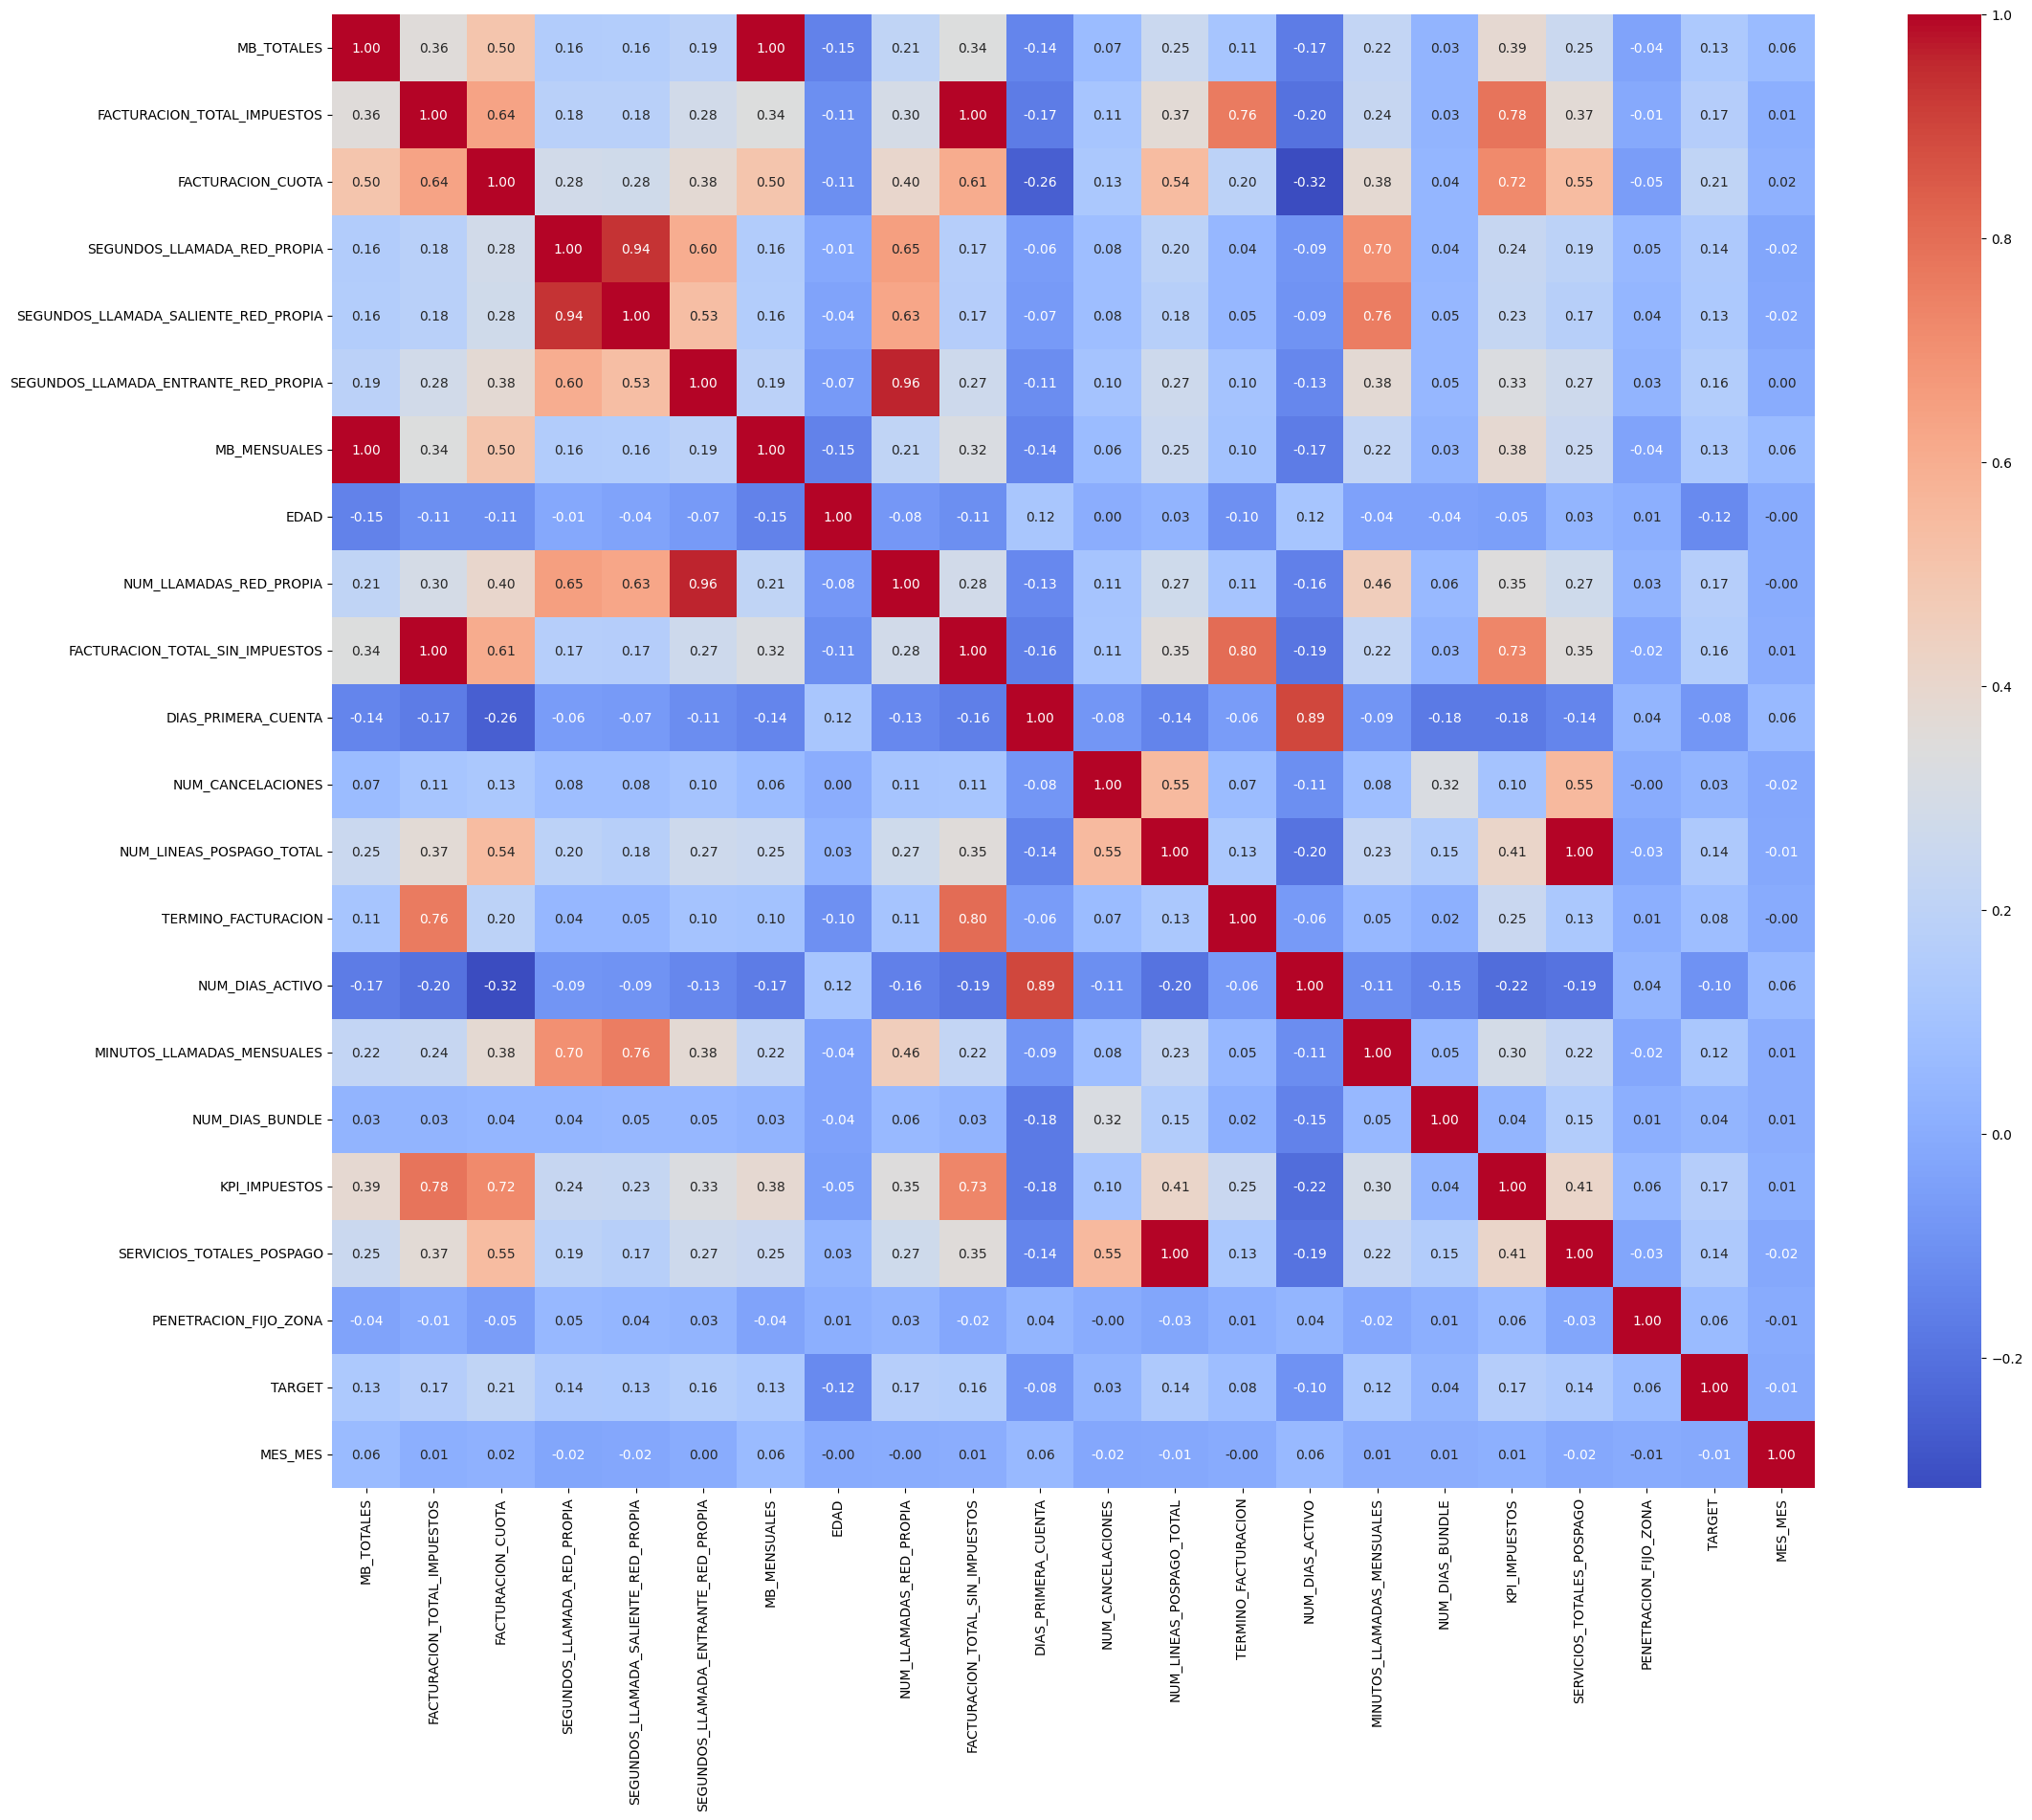

In [31]:
# Matriz de correlación
corr_matrix = df_reduced.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Bien, viendo que hay varias columnas con una correlación mayor a 0.9, voy a eliminar todas aquellas columnas que tengan más de un 0.9 de correlación con otra columna, teniendo cuidado de no eliminar las que sean con ellas mismas y eliminando solo una

In [32]:
corr_threshold = 0.9

columns_to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold and i != j:
            columns_to_drop.append(corr_matrix.columns[i])
df_reduced = df_reduced.drop(columns=columns_to_drop)

Pinto el histograma de mis nuevas variables

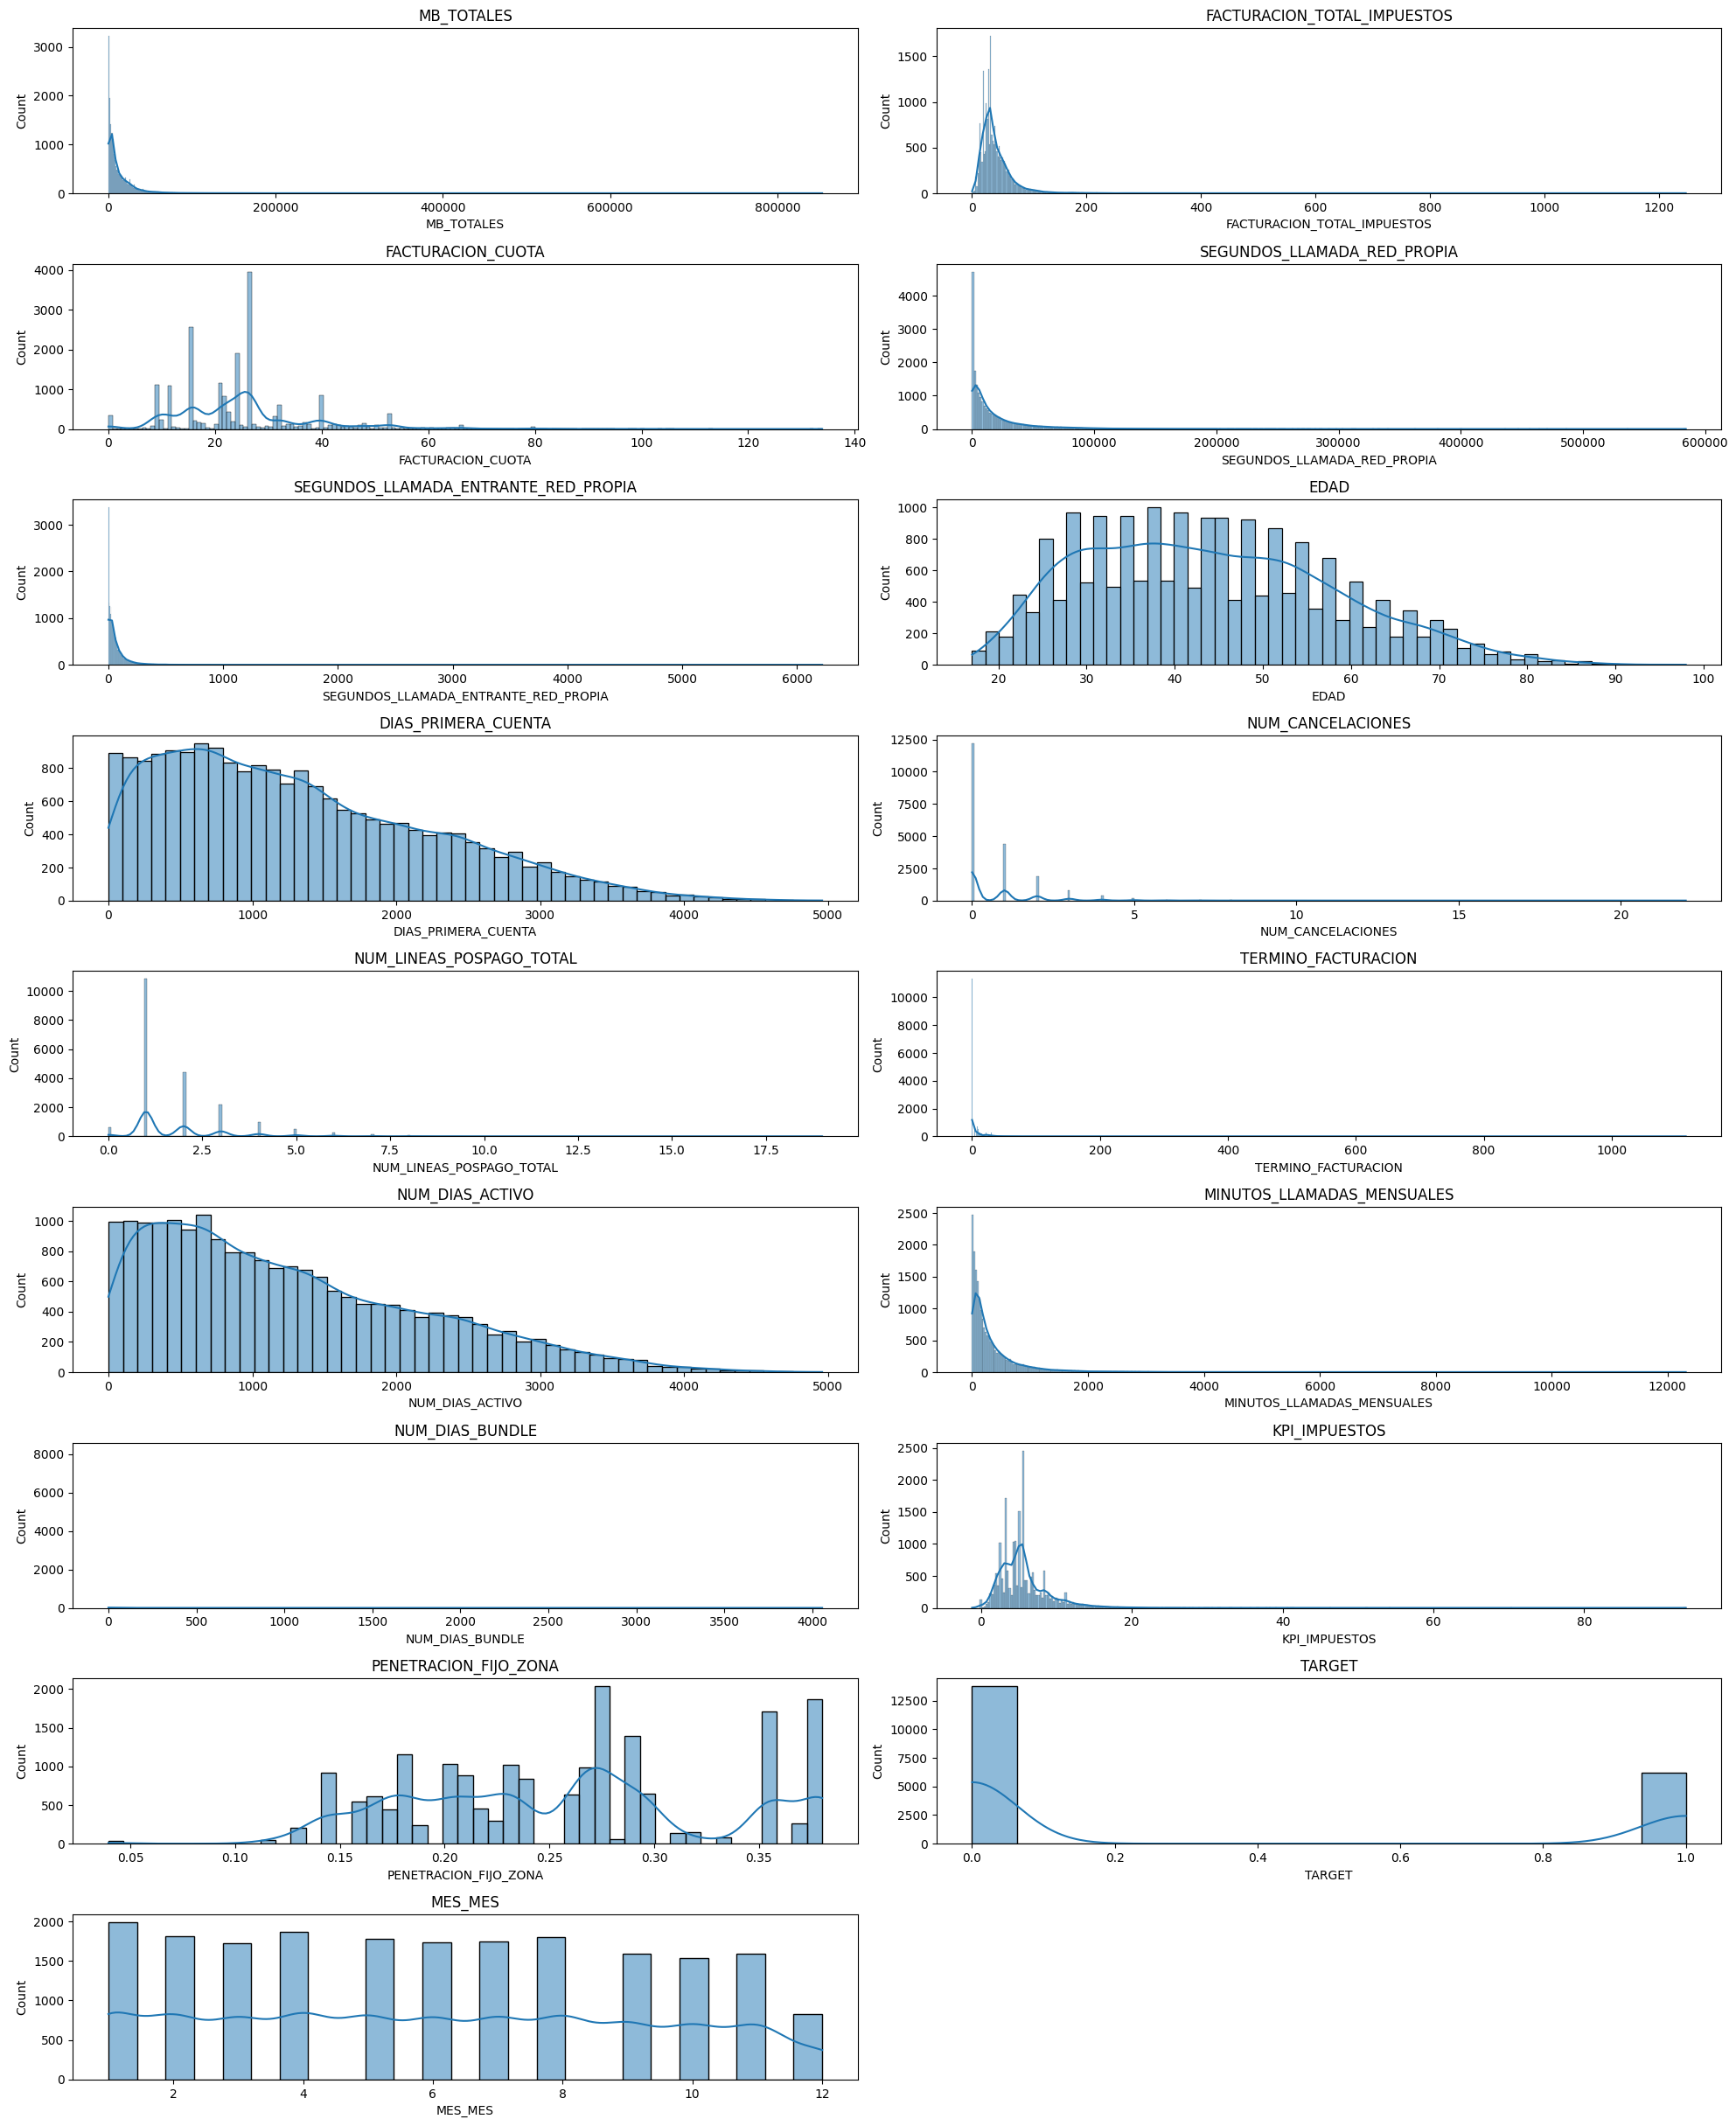

In [33]:
variables = df_reduced.columns
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_reduced[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

Y el boxplot de las mismas

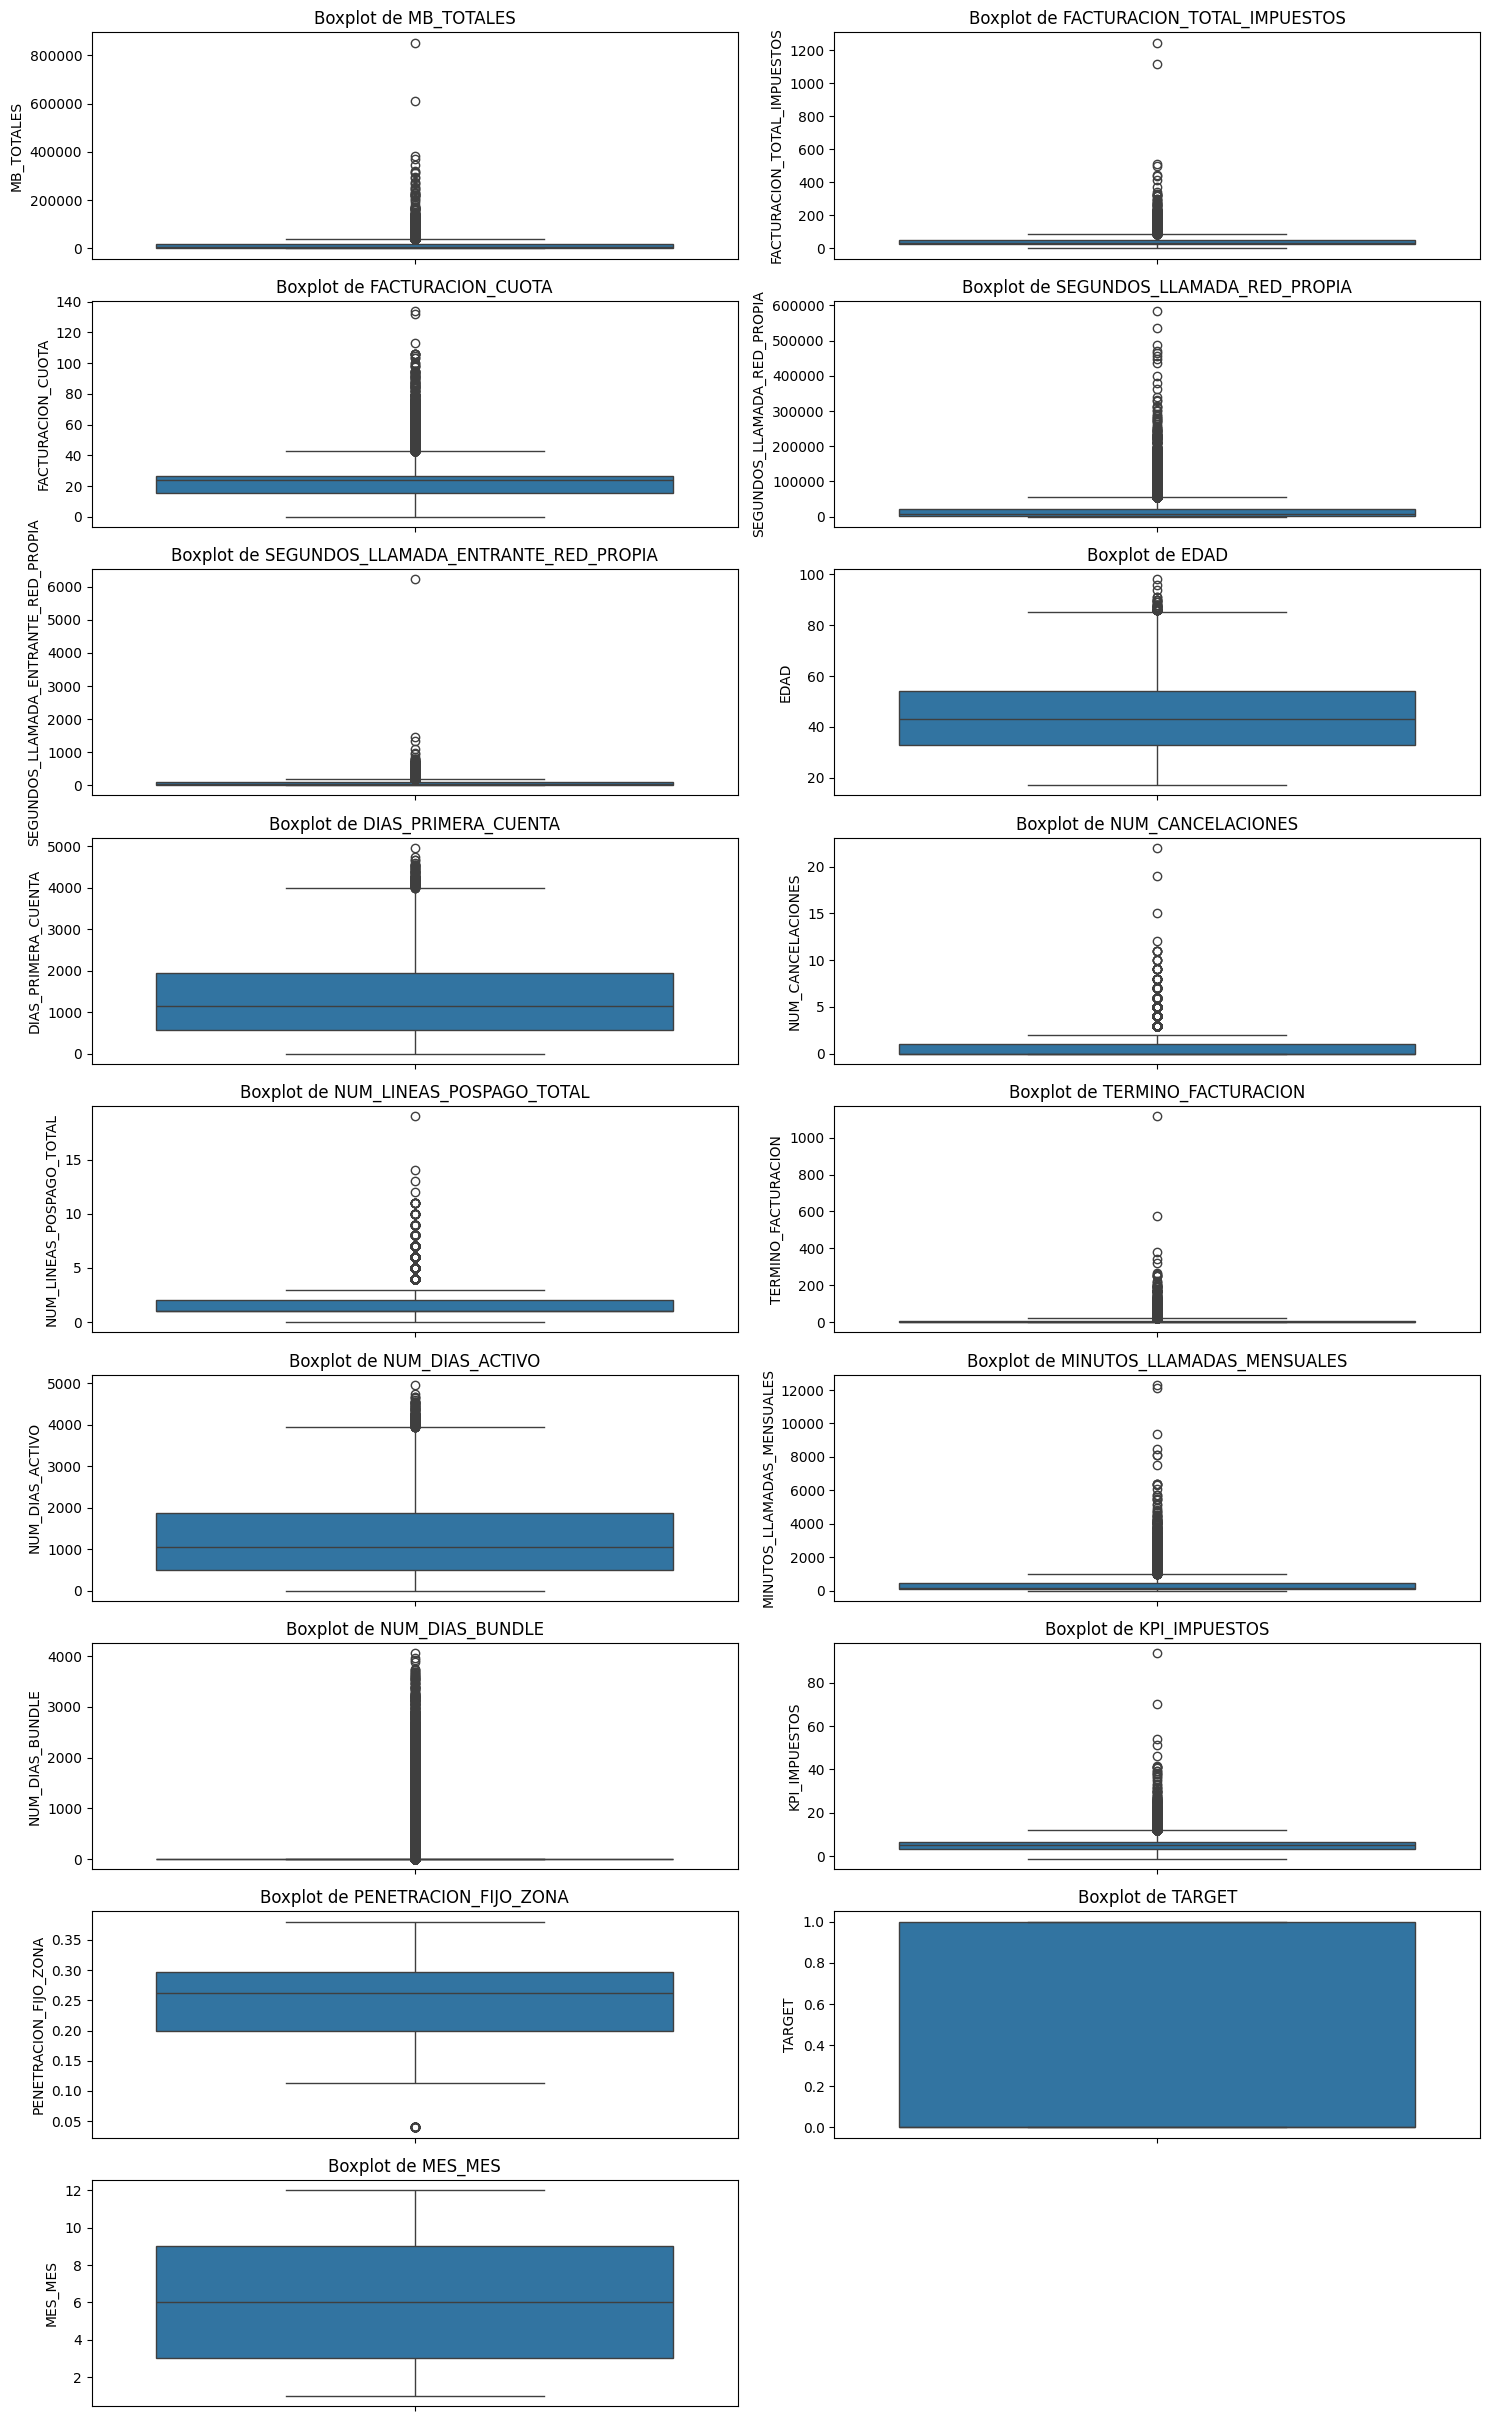

In [34]:
plt.figure(figsize=(15, 35))
for i, column in enumerate(variables, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_reduced[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

Finalmente veo mi dataset final

In [35]:
df_reduced.shape

(20000, 17)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\427259312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21560\427259312.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')


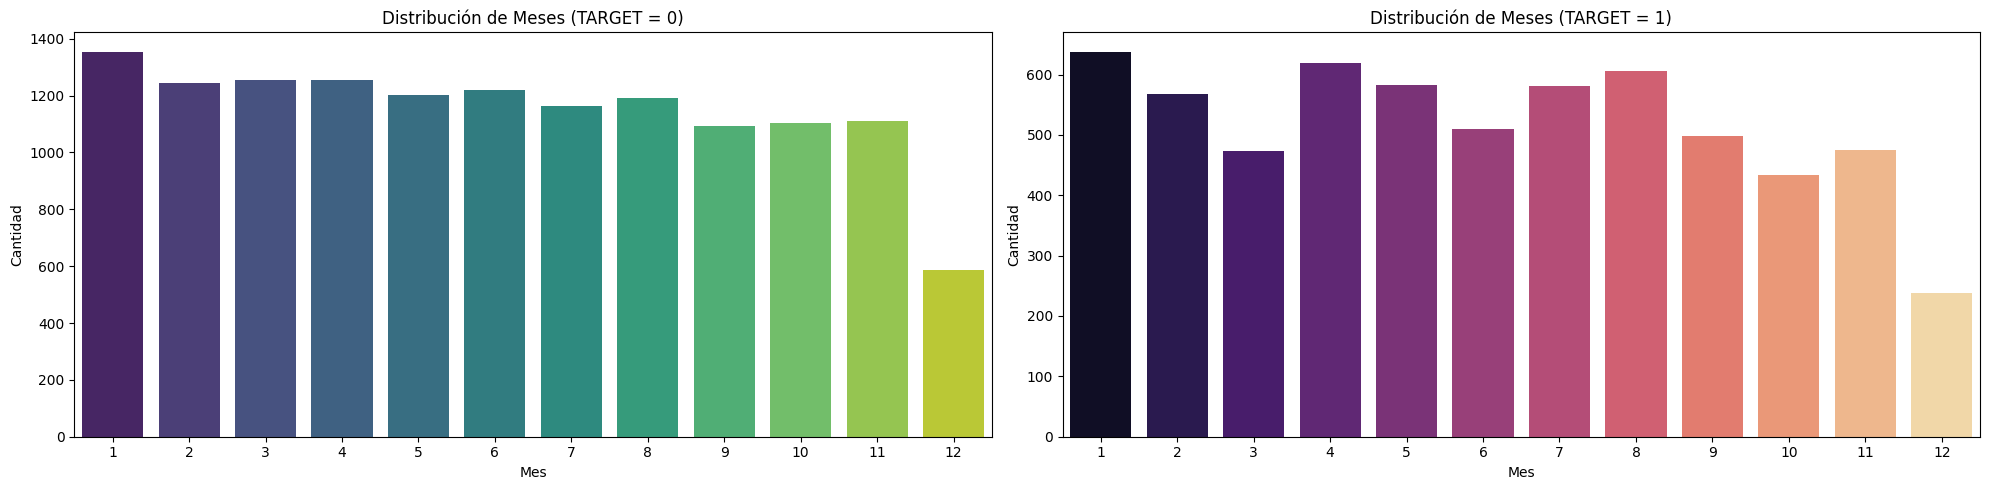

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(ax=axes[0], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 0], palette='viridis')
axes[0].set_title('Distribución de Meses (TARGET = 0)')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Cantidad')

sns.countplot(ax=axes[1], x='MES_MES', data=df_reduced[df_reduced['TARGET'] == 1], palette='magma')
axes[1].set_title('Distribución de Meses (TARGET = 1)')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

### Relleno de nulos

Primero veo cuántos nulos tengo

In [37]:
df_reduced.isnull().sum()

MB_TOTALES                               259
FACTURACION_TOTAL_IMPUESTOS               76
FACTURACION_CUOTA                         76
SEGUNDOS_LLAMADA_RED_PROPIA              157
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     157
EDAD                                      29
DIAS_PRIMERA_CUENTA                        0
NUM_CANCELACIONES                          0
NUM_LINEAS_POSPAGO_TOTAL                   0
TERMINO_FACTURACION                       76
NUM_DIAS_ACTIVO                          550
MINUTOS_LLAMADAS_MENSUALES               251
NUM_DIAS_BUNDLE                            0
KPI_IMPUESTOS                             76
PENETRACION_FIJO_ZONA                   1323
TARGET                                     0
MES_MES                                    0
dtype: int64

Bien, para el relleno de nulos usaré la clase <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html">IterativeImputer</a> que usa <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#bayesianridge">BayesianRidge</a> para predecir los nulos basado en el resto de variables

In [38]:
target = df_reduced['TARGET']
features = df_reduced.drop('TARGET', axis=1)

imputer = IterativeImputer(max_iter=10000, random_state=42, initial_strategy='median', verbose=1)
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

df_imputed = features_imputed.copy()
df_imputed['TARGET'] = target.values

[IterativeImputer] Completing matrix with shape (20000, 16)
[IterativeImputer] Change: 26438.015263034416, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 9773.29101015985, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 5975.924897818698, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 3389.9469258919157, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 1915.885949707194, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 1155.8532003340886, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 865.0630404821961, scaled tolerance: 853.6135937500001 
[IterativeImputer] Change: 682.5635070070297, scaled tolerance: 853.6135937500001 
[IterativeImputer] Early stopping criterion reached.


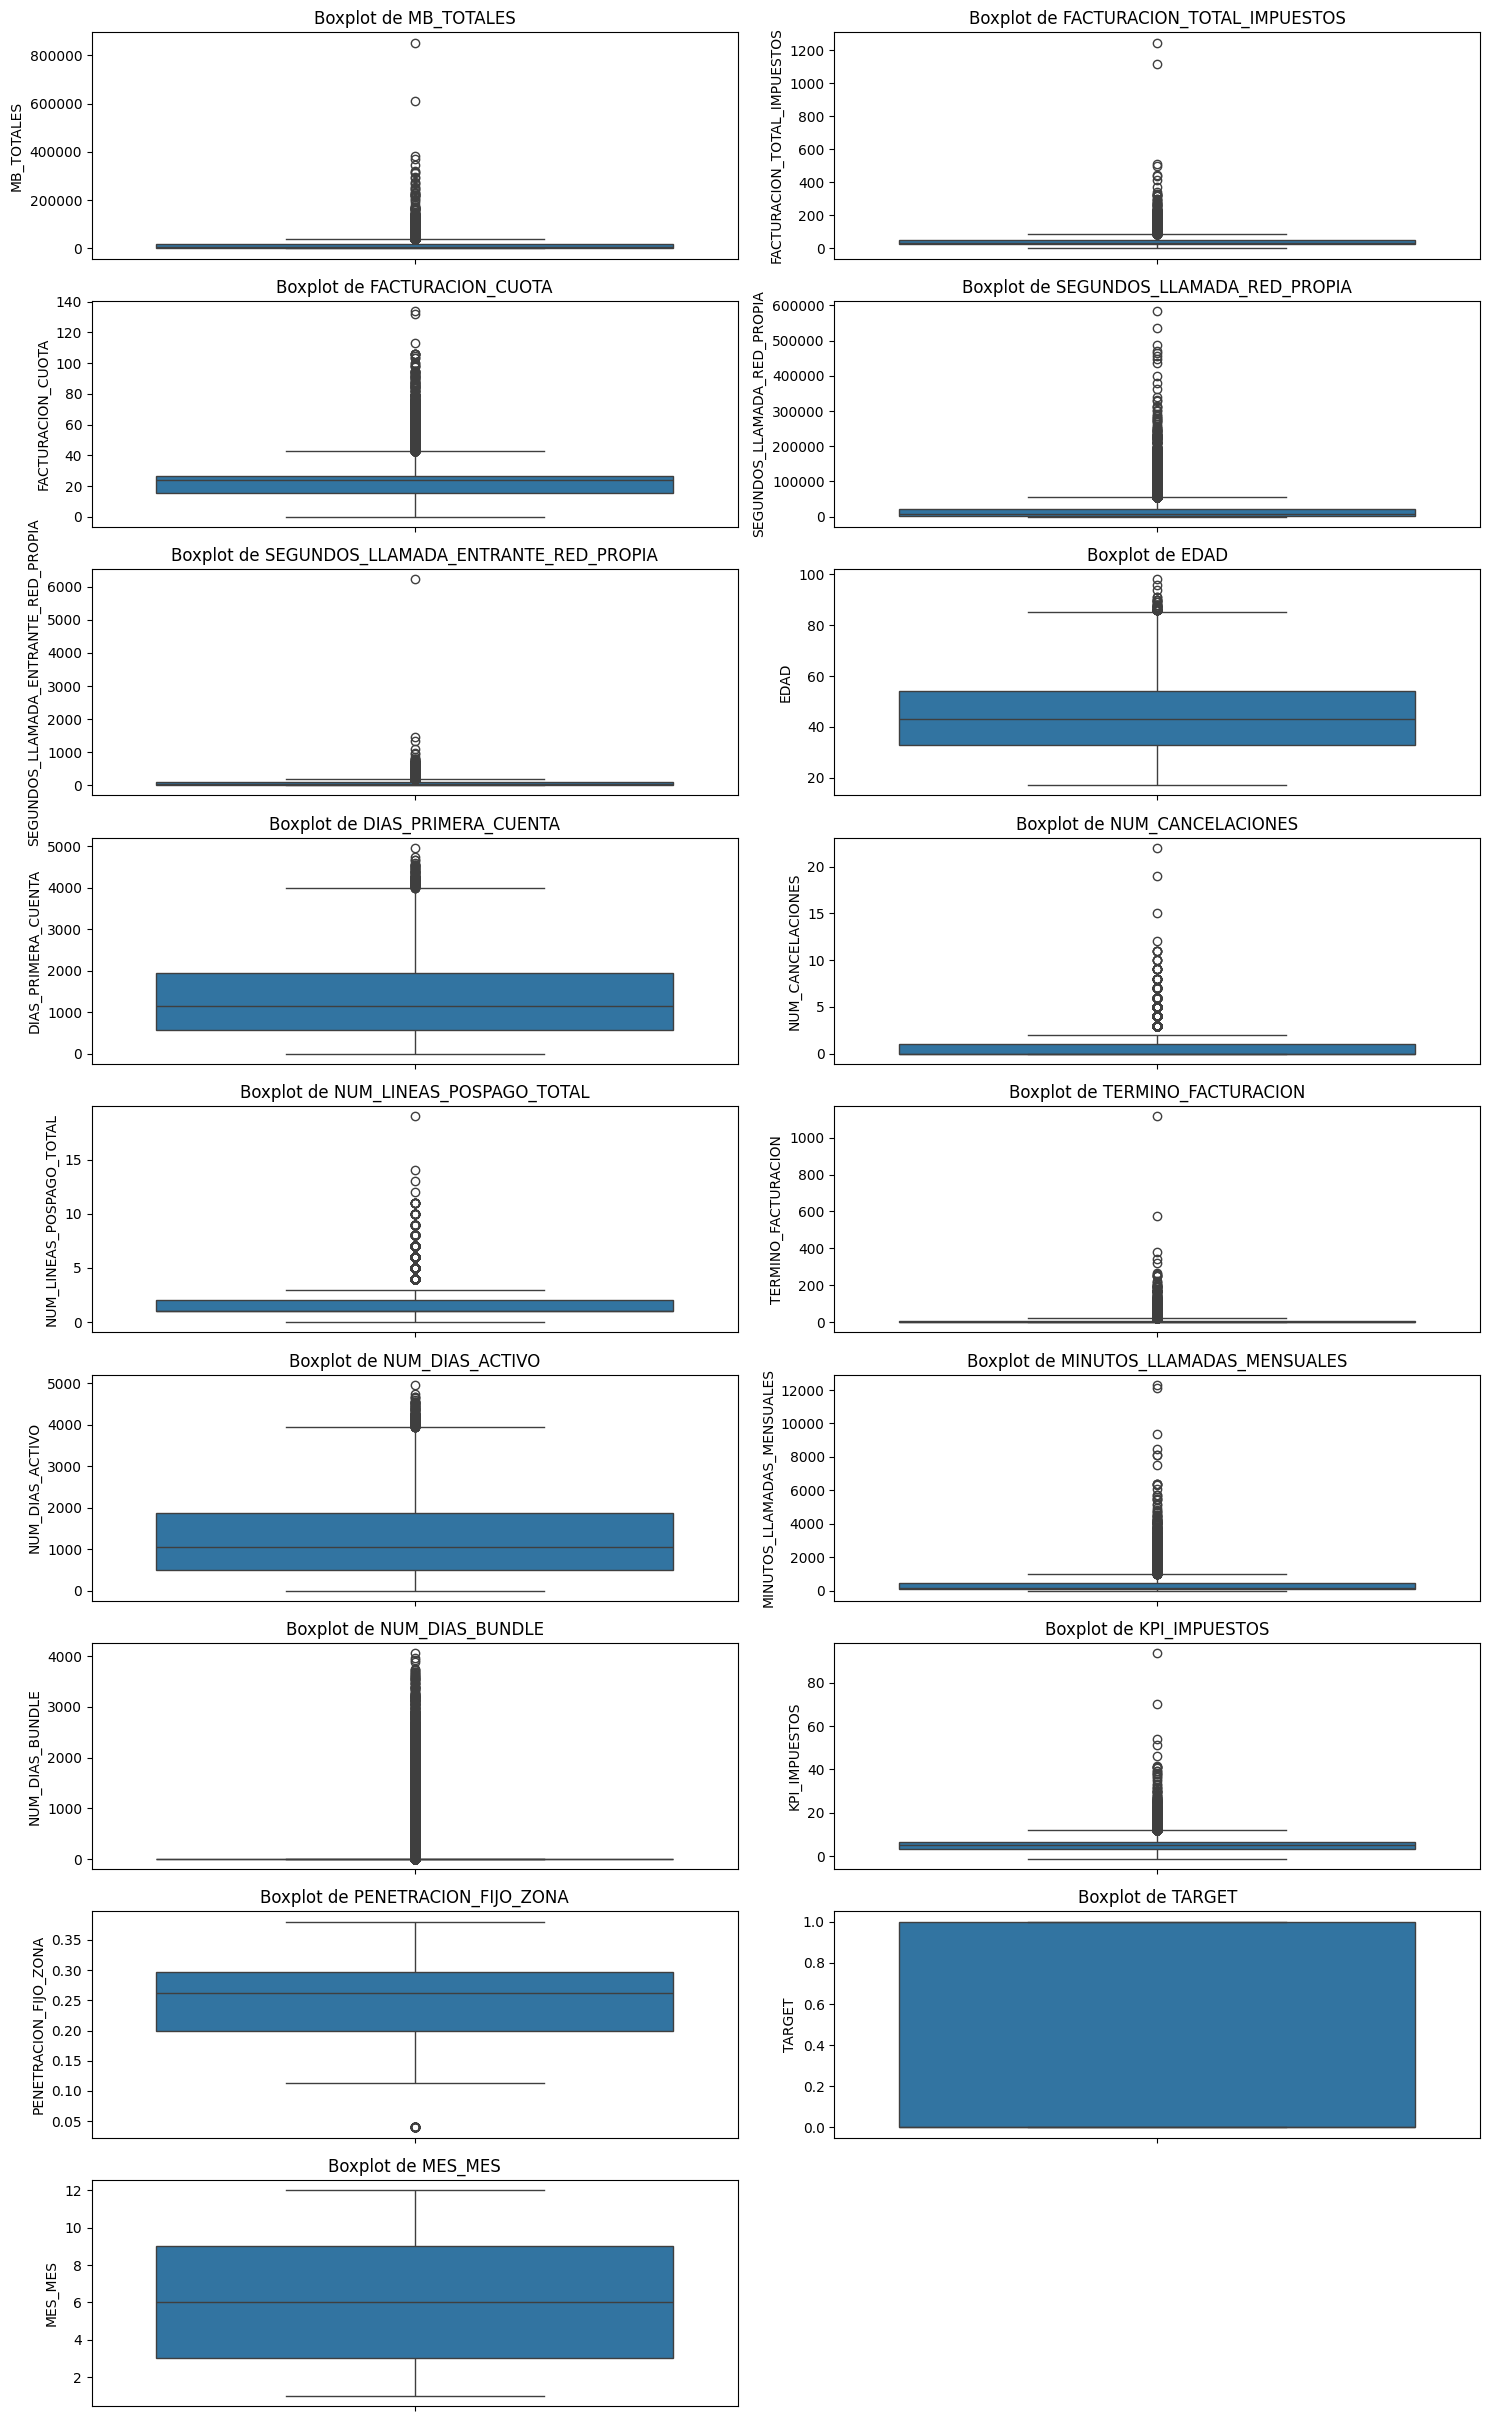

In [39]:
plt.figure(figsize=(15, 35))
for i, column in enumerate(variables, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_reduced[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

Elimino los outliers con la clase <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#localoutlierfactor">LocalOutlierFactor</a>

In [40]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

yhat = lof.fit_predict(df_imputed)

mask = yhat != -1
df_cleaned = df_imputed[mask]

print(f"Outliers detectados y eliminados: {np.sum(yhat == -1)}")
print(f"Datos restantes después de la limpieza: {df_cleaned.shape[0]}")

Outliers detectados y eliminados: 1000
Datos restantes después de la limpieza: 19000


Y pinto los boxplots e histogramas de mi nuevo dataset

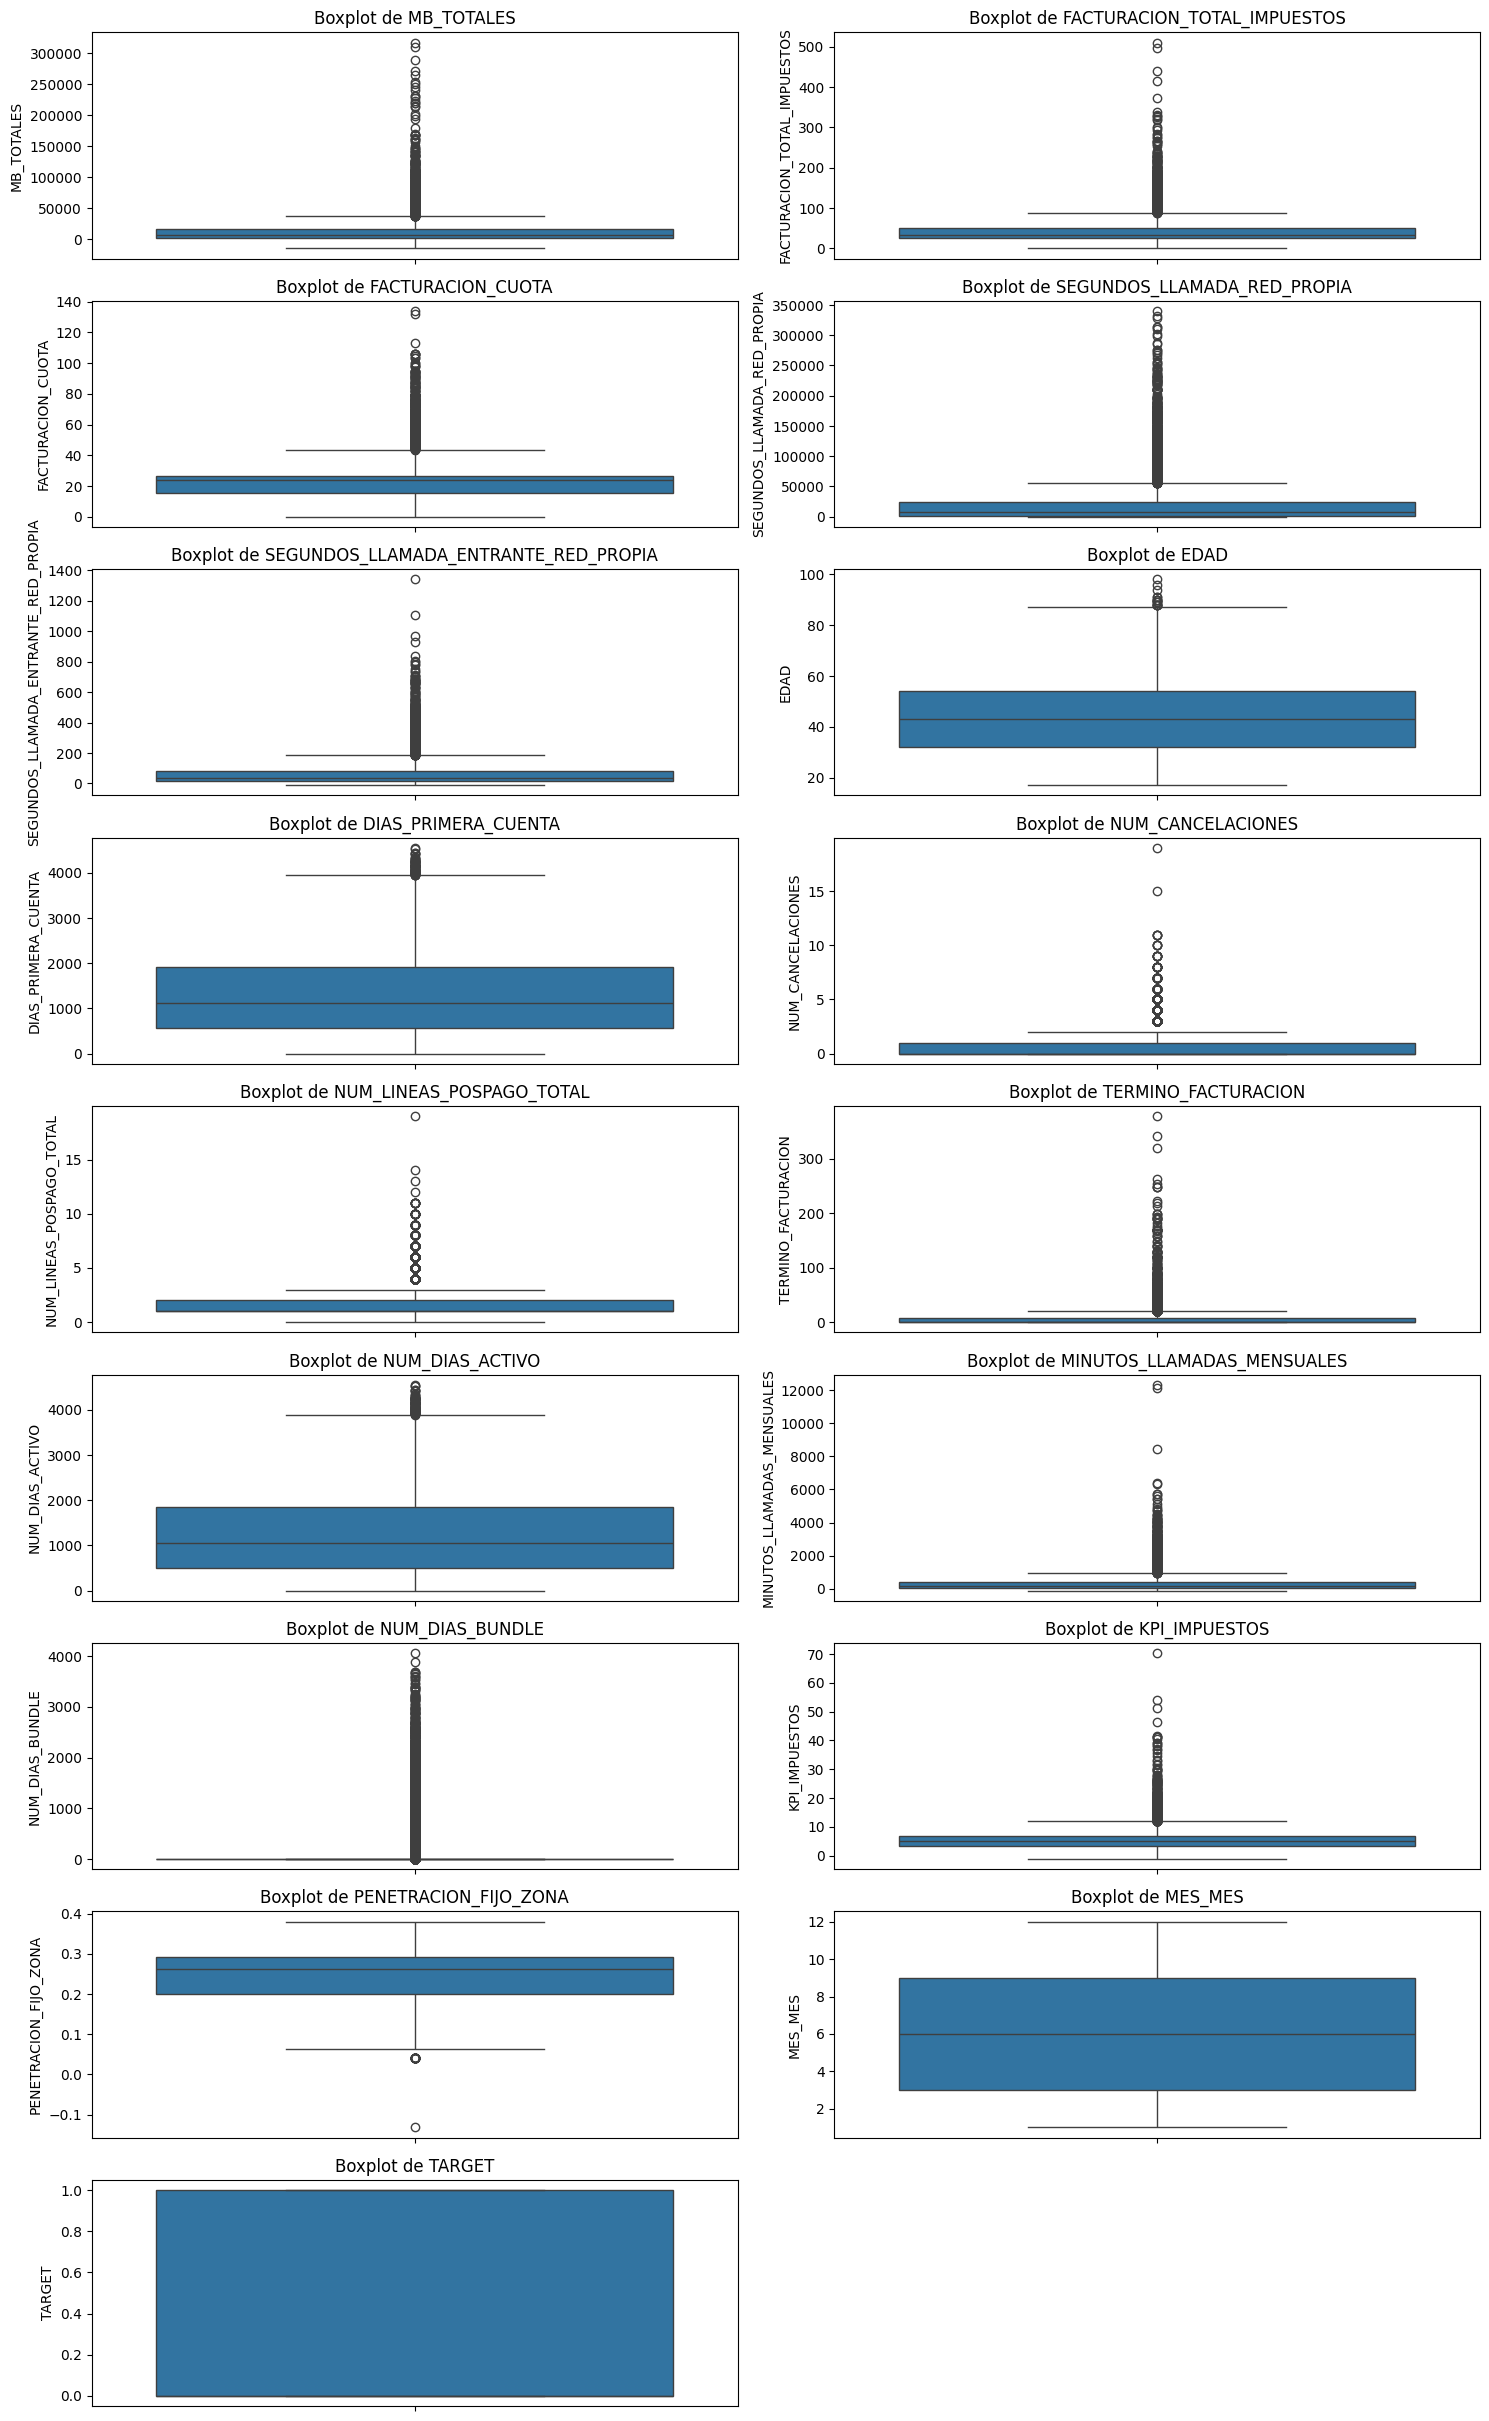

In [41]:
plt.figure(figsize=(15, 35))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(13, 2, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

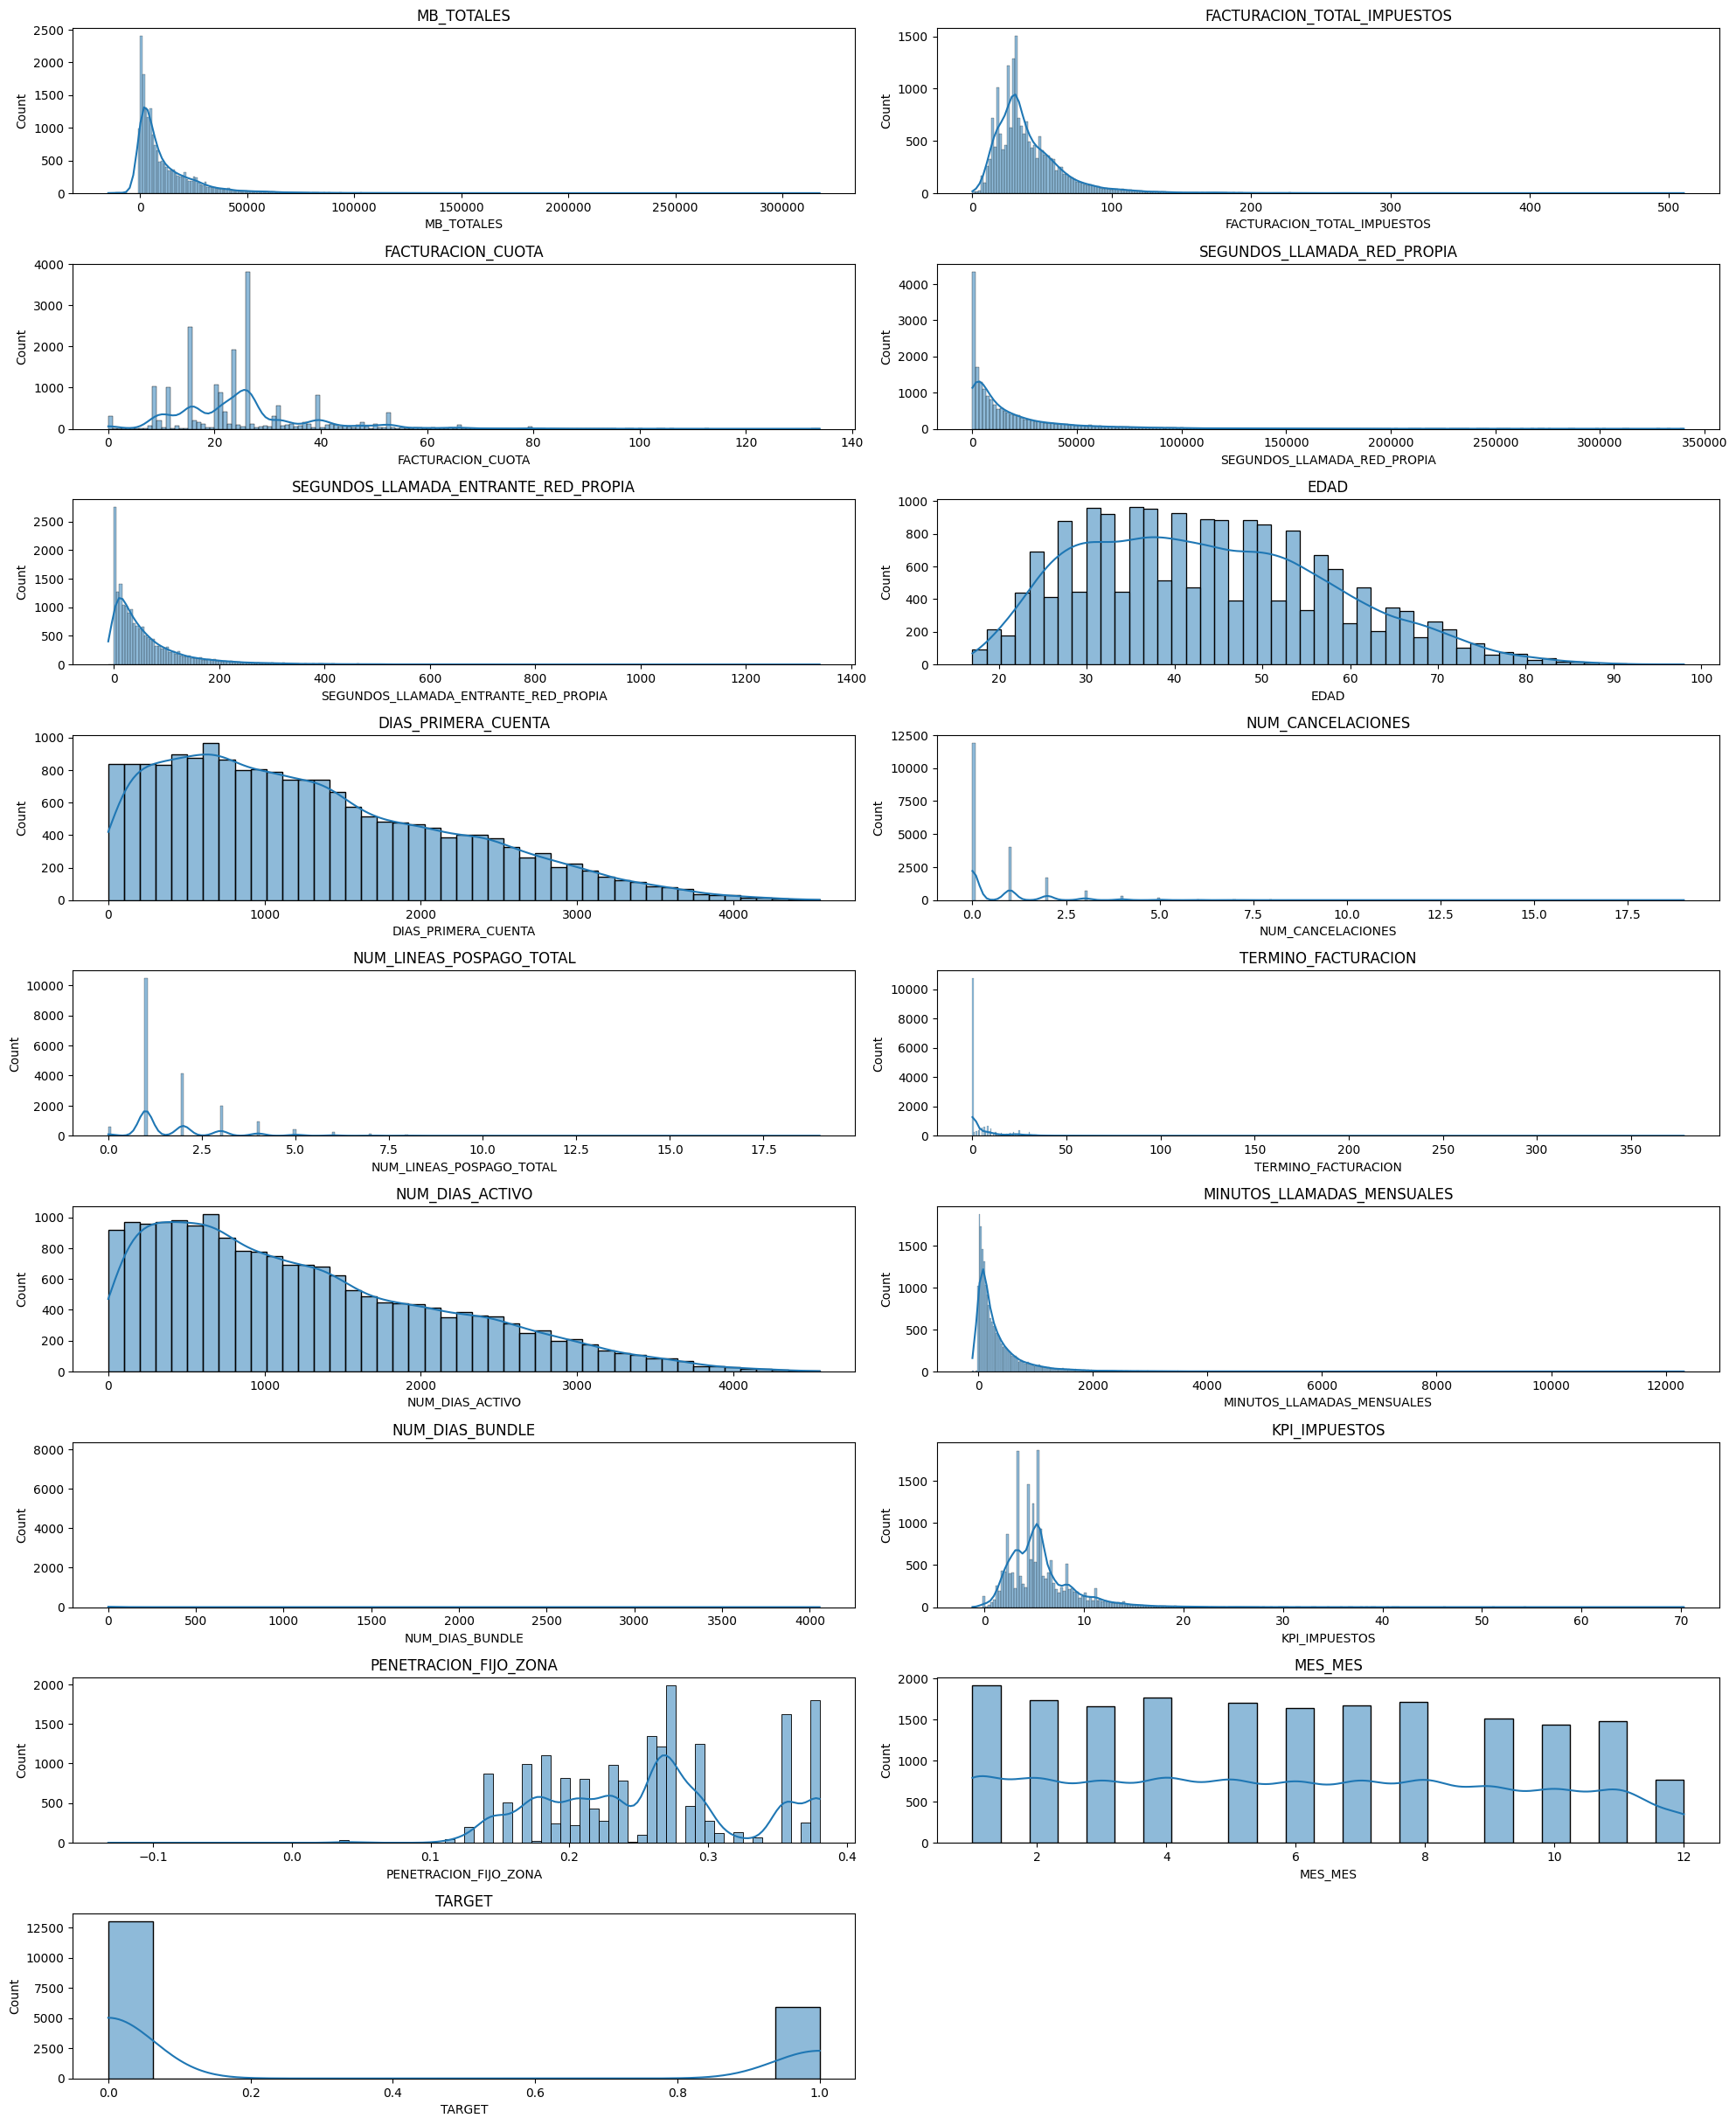

In [42]:
variables = df_cleaned.columns
ax, fig = plt.subplots(figsize=(20, 35), nrows=13, ncols=2)
fig = fig.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_cleaned[var], ax=fig[i], kde=True)
    fig[i].set_title(var)
plt.tight_layout()
# delete the unused subplots
for i in range(len(variables), len(fig)):
    fig[i].set_visible(False)
plt.show()

In [43]:
df_cleaned.shape

(19000, 17)

Guardo el dataset limpio y el solo imputado para usarlo en próximos usos del cuaderno

In [44]:
df_cleaned.to_csv('./caso_final_small_20k_con_mes_cleaned.csv', index=False)

In [45]:
df_imputed.to_csv('./caso_final_small_20k_con_mes_imputed.csv', index=False)

## Entrenamiento de modelos (Pre-clustering)

In [46]:
# %pip install statsmodels
%pip install plotly
%pip install -U nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Importo mi modelo limpio

In [2]:
df_cleaned = pd.read_csv('./caso_final_small_20k_con_mes_cleaned.csv')

Y hago las transformaciones necesarias como ha sido explicado más arriba

In [3]:
X = df_cleaned.drop('TARGET', axis=1)
y = df_cleaned['TARGET']

In [4]:
# Transformar las columnas MES_MES y MES_AÑO
mes_sin = np.sin(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)
mes_cos = np.cos(2 * np.pi * X['MES_MES'] / 12).values.reshape(-1, 1)

X['MES_SIN'] = mes_sin
X['MES_COS'] = mes_cos
X = X.drop(['MES_MES'], axis=1)

In [5]:
X.head()

MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0    232.121597                    10.186000           0.000000   
1  18280.292969                    32.005001          26.450001   
2   2141.692810                    37.442001          31.400000   
3   3181.986496                    20.001000          16.530000   
4  25626.083984                    37.005001          26.450001   

   SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  EDAD  \
0                       4523.0                                  28.0  39.0   
1                      13288.0                                  49.0  25.0   
2                         13.0                                   0.0  47.0   
3                          0.0                                   0.0  43.0   
4                      72783.0                                 151.0  40.0   

   DIAS_PRIMERA_CUENTA  NUM_CANCELACIONES  NUM_LINEAS_POSPAGO_TOTAL  \
0                 44.0                0.0                       1.0   
1                387.0                1.0                       2.0   
2               1389.0                0.0                       2.0   
3                154.0                2.0                       3.0   
4               2205.0                0.0                       1.0   

   TERMINO_FACTURACION  NUM_DIAS_ACTIVO  MINUTOS_LLAMADAS_MENSUALES  \
0                  0.0             44.0                   21.683399   
1                  0.0            387.0                  166.050007   
2                  4.0           1389.0                  108.850102   
3                  0.0            154.0                   65.799899   
4                  5.0           2205.0                  519.683305   

   NUM_DIAS_BUNDLE  KPI_IMPUESTOS  PENETRACION_FIJO_ZONA       MES_SIN  \
0              0.0       1.767800               0.264612  5.000000e-01   
1            435.0       5.555000               0.380171 -5.000000e-01   
2              0.0       2.042002               0.156041  1.224647e-16   
3              0.0       3.471001               0.228810  1.224647e-16   
4              1.0       5.555000               0.210286  5.000000e-01   

    MES_COS  
0  0.866025  
1  0.866025  
2 -1.000000  
3 -1.000000  
4  0.866025

In [6]:
X.shape

(19000, 17)

In [7]:
print(X.dtypes)

MB_TOTALES                              float64
FACTURACION_TOTAL_IMPUESTOS             float64
FACTURACION_CUOTA                       float64
SEGUNDOS_LLAMADA_RED_PROPIA             float64
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA    float64
EDAD                                    float64
DIAS_PRIMERA_CUENTA                     float64
NUM_CANCELACIONES                       float64
NUM_LINEAS_POSPAGO_TOTAL                float64
TERMINO_FACTURACION                     float64
NUM_DIAS_ACTIVO                         float64
MINUTOS_LLAMADAS_MENSUALES              float64
NUM_DIAS_BUNDLE                         float64
KPI_IMPUESTOS                           float64
PENETRACION_FIJO_ZONA                   float64
MES_SIN                                 float64
MES_COS                                 float64
dtype: object


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Bien, he decicido que al usar optuna, voy a añadir un parámetro que permita ajustar el modelo a si usa resampling o no, por ello, hago dos datasets, uno con oversampling y otro que dejo tal cual

In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled.copy(), y_train.copy())

Para mi ajuste de hiperparámetros hago un dataset de testing y otro de validación

In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42, stratify=y_test, shuffle=True)

Añado un <a href="https://optuna.readthedocs.io/en/stable/reference/pruners.html">pruner</a> que parará aquellos trials de optuna no prometedores

In [12]:
pruner = optuna.pruners.SuccessiveHalvingPruner(min_resource=1, reduction_factor=4, min_early_stopping_rate=0)

Bien, para toda la evaluación y optimiación usaré la métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#balanced-accuracy-score">balanced_accuracy_score</a> que hace la media entre el recall de las dos clases, he decidido usar esta métrica por el hecho de que lo entrené previamente con AUC, sin embargo tendía a predecir todo 1 o todo 0

#### LogisticRegression

In [58]:
def optimize_lr(trial):
    try:
        C = trial.suggest_float('C', 1e-10, 1e10, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
        if penalty == 'elasticnet':
            l1_ratio = trial.suggest_float('l1_ratio', 0, 1)
        else:
            l1_ratio = None
        lr = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=10000, l1_ratio=l1_ratio)
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            lr.fit(X_train_resampled, y_train_resampled)
        else:
            lr.fit(X_train_scaled, y_train)
        y_pred = lr.predict(X_val)
        del lr
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f'Error in Logistic Regression optimization: {e}')
        return float('-inf')

In [59]:
optuna.logging.set_verbosity(optuna.logging.INFO)

study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr.db', load_if_exists=True, study_name='Logistic Regression BAS', pruner=pruner)

study.optimize(optimize_lr, n_trials=300, gc_after_trial=True)

best_lr = study.best_params

joblib.dump(study, 'optuna_study_lr.pkl')

best_lr

[I 2024-06-09 22:13:01,899] A new study created in RDB with name: Logistic Regression BAS
ERROR:root:Error in Logistic Regression optimization: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.
[I 2024-06-09 22:13:02,039] Trial 0 finished with value: -inf and parameters: {'C': 1.3567571193450672e-07, 'penalty': 'elasticnet', 'solver': 'lbfgs', 'l1_ratio': 0.8653807121911834, 'use_resampled': False}. Best is trial 0 with value: -inf.
[I 2024-06-09 22:13:03,995] Trial 1 finished with value: 0.6273225410147969 and parameters: {'C': 54.92012882320188, 'penalty': 'l2', 'solver': 'lbfgs', 'use_resampled': True}. Best is trial 1 with value: 0.6273225410147969.
ERROR:root:Error in Logistic Regression optimization: Solver newton-cholesky supports only 'l2' or None penalties, got elasticnet penalty.
[I 2024-06-09 22:13:04,924] Trial 2 finished with value: -inf and parameters: {'C': 0.0025079344290298454, 'penalty': 'elasticnet', 'solver': 'newton-cholesky', 'l1_ratio': 0

{'C': 54.92012882320188,
 'penalty': 'l2',
 'solver': 'lbfgs',
 'use_resampled': True}

In [60]:
#optuna.delete_study('Logistic Regression BAS', storage='sqlite:///optuna_study_lr.db')

Veo cuál ha sido el mejor valor

In [61]:
study.best_value

0.6273225410147969

In [62]:
study = optuna.load_study(study_name='Logistic Regression BAS', storage='sqlite:///optuna_study_lr.db')

Pinto los gráficos de los trials

In [63]:
optuna.visualization.plot_optimization_history(study)

In [64]:
optuna.visualization.plot_param_importances(study)

[W 2024-06-09 22:22:08,766] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,767] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,767] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,767] Trial 4 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,768] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,768] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,768] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,768] Trial 17 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,769] Trial 20 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:08,770] Trial 2

In [65]:
optuna.visualization.plot_slice(study)

[W 2024-06-09 22:22:09,198] Trial 0 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,198] Trial 2 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,199] Trial 3 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,199] Trial 4 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,200] Trial 5 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,200] Trial 6 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,200] Trial 7 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,201] Trial 17 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,201] Trial 20 is omitted in visualization because its objective value is inf or nan.
[W 2024-06-09 22:22:09,201] Trial 2

Y creo y evalúo el modelo final

In [66]:
best_lr = study.best_params
use_resampled = best_lr.pop('use_resampled')
lr = LogisticRegression(**best_lr, random_state=42, max_iter=10000)
if use_resampled:
    lr.fit(X_train_resampled, y_train_resampled)
else:
    lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1958
           1       0.44      0.59      0.51       892

    accuracy                           0.64      2850
   macro avg       0.61      0.63      0.61      2850
weighted avg       0.68      0.64      0.65      2850



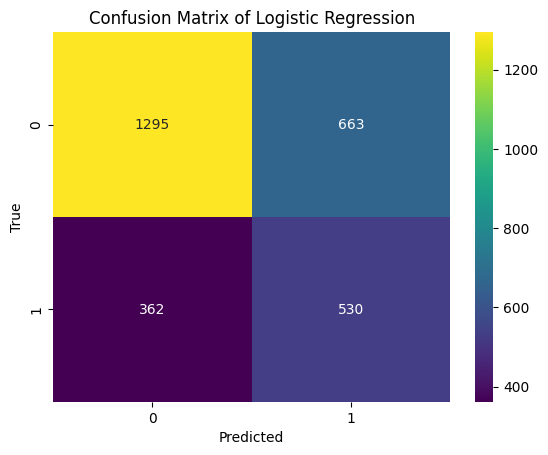

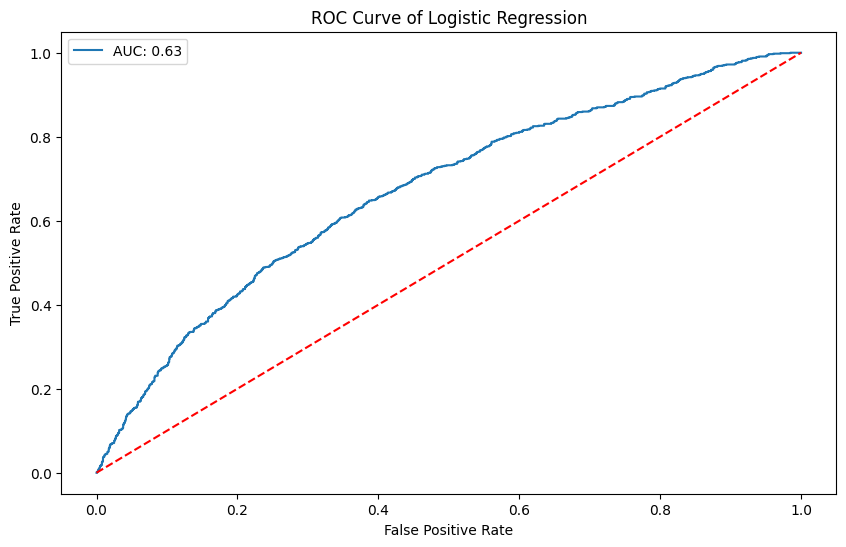

array([[0.56535908, 0.43464092],
       [0.15143249, 0.84856751],
       [0.59125054, 0.40874946],
       ...,
       [0.47764189, 0.52235811],
       [0.34468185, 0.65531815],
       [0.22456471, 0.77543529]])

In [67]:
y_pred = lr.predict(X_test)

roc_auc_lr = roc_auc_score(y_test, y_pred)

cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

roc_auc_lr

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend()
plt.show()
lr.predict_proba(X_test)

No ha ido del todo mal, pero puede mejorar

#### RandomForest

Para RandomForest , dado el desbalanceo de clases he decidido añadir el parámetro "class_weight" que evaluará el peso que darle a una clase respecto a otra

In [68]:
def optimize_random_forest(trial):
    try:
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 1, 50)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        class_weight_option = trial.suggest_int('class_weight', 0, 5)
        
        if class_weight_option == 0:
            class_weight = None
        elif class_weight_option == 1:
            class_weight = 'balanced'
        elif class_weight_option == 2:
            class_weight = {0: 1, 1: 2}
        elif class_weight_option == 3:
            class_weight = {0: 1, 1: 3}
        elif class_weight_option == 4:
            class_weight = {0: 1, 1: 4}
        elif class_weight_option == 5:
            class_weight = {0: 1, 1: 5}
        

        rf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, 
            random_state=42, 
            criterion=criterion, 
            max_features=max_features, 
            n_jobs=-1,
            class_weight=class_weight
        )
        
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            rf.fit(X_train_resampled, y_train_resampled)
        else:
            rf.fit(X_train_scaled, y_train)

        y_pred = rf.predict(X_val)
        del rf
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [69]:
optuna.logging.set_verbosity(optuna.logging.INFO)

study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf.db', load_if_exists=True, study_name='RandomForest BAS', pruner=pruner)

study.optimize(optimize_random_forest, n_trials=200, gc_after_trial=True)

best_rf = study.best_params

joblib.dump(study, 'optuna_study_rf.pkl')

best_rf

[I 2024-06-09 22:22:10,956] A new study created in RDB with name: RandomForest BAS
[I 2024-06-09 22:22:16,838] Trial 0 finished with value: 0.6045836549647202 and parameters: {'n_estimators': 400, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 10, 'criterion': 'entropy', 'max_features': 'sqrt', 'class_weight': 4, 'use_resampled': True}. Best is trial 0 with value: 0.6045836549647202.
[I 2024-06-09 22:22:22,018] Trial 1 finished with value: 0.6155372421965883 and parameters: {'n_estimators': 337, 'max_depth': 26, 'min_samples_split': 11, 'min_samples_leaf': 20, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': 0, 'use_resampled': True}. Best is trial 1 with value: 0.6155372421965883.
[I 2024-06-09 22:22:32,158] Trial 2 finished with value: 0.62214201067635 and parameters: {'n_estimators': 717, 'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 9, 'criterion': 'gini', 'max_features': 'sqrt', 'class_weight': 2, 'use_resampled': True}. Best is trial 2 wi

{'n_estimators': 875,
 'max_depth': 46,
 'min_samples_split': 6,
 'min_samples_leaf': 16,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'class_weight': 2,
 'use_resampled': False}

In [70]:
# optuna.delete_study('RandomForest AUC CV', storage='sqlite:///optuna_study_rf.db')

Veo cuál ha sido el mejor valor

In [71]:
best_rf

{'n_estimators': 875,
 'max_depth': 46,
 'min_samples_split': 6,
 'min_samples_leaf': 16,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'class_weight': 2,
 'use_resampled': False}

In [72]:
study.best_value

0.6392709205362093

In [73]:
study = optuna.load_study(study_name='RandomForest BAS', storage='sqlite:///optuna_study_rf.db')

Pinto los gráficos de los trials

In [74]:
optuna.visualization.plot_optimization_history(study)

In [75]:
optuna.visualization.plot_param_importances(study)

In [76]:
optuna.visualization.plot_slice(study)

Y creo y evalúo el modelo final

In [77]:
best_rf = study.best_params
class_weight_option = best_rf['class_weight']
use_resampled = best_rf['use_resampled']
if class_weight_option == 0:
    class_weight = None
elif class_weight_option == 1:
    class_weight = 'balanced'
elif class_weight_option == 2:
    class_weight = {0: 1, 1: 2}
elif class_weight_option == 3:
    class_weight = {0: 1, 1: 3}
else:
    class_weight = {0: 1, 1: 5}

best_rf.pop('class_weight')
best_rf.pop('use_resampled')

rf = RandomForestClassifier(**best_rf,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

if use_resampled:
    rf.fit(X_train_resampled, y_train_resampled)
else:
    rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1958
           1       0.48      0.55      0.51       892

    accuracy                           0.67      2850
   macro avg       0.63      0.64      0.63      2850
weighted avg       0.69      0.67      0.68      2850



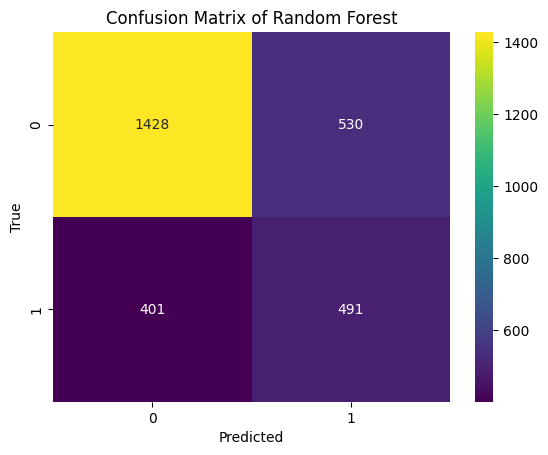

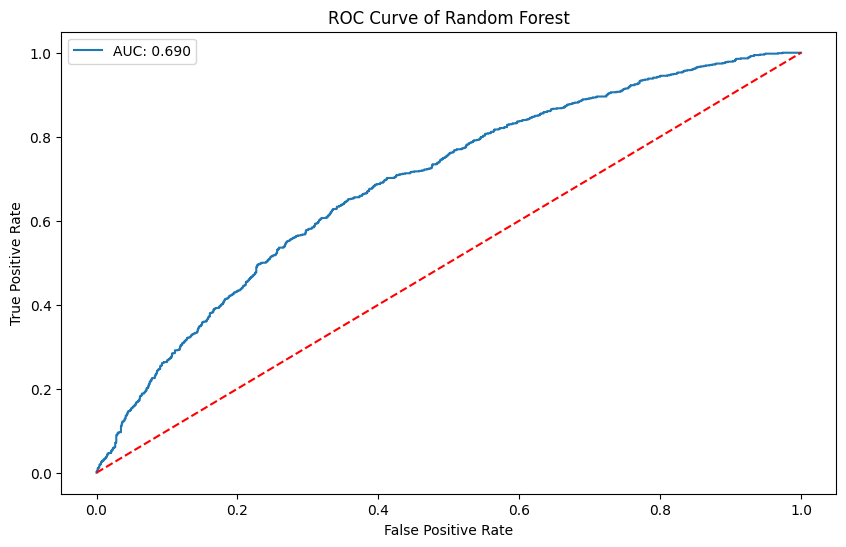

In [78]:
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Random Forest')
plt.show()

roc_auc_rf

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.legend()

Este modelo ha dado mejores resultados que el anterior, pese a tender a predecir demasiados 1

In [13]:
def optimize_xgboost(trial):
    try:
        # scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
        n_estimators = trial.suggest_int('n_estimators', 100, 600)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])  # Eliminado 'gblinear' para reducir complejidad
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
        gamma = trial.suggest_float('gamma', 0, 5)
        reg_alpha = trial.suggest_float('reg_alpha', 1e-5, 20, log=True)
        reg_lambda = trial.suggest_float('reg_lambda', 1e-5, 10, log=True)
        # scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 20)
        
        # Crear el modelo de XGBoost
        xgb_model = xgb.XGBClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            learning_rate=learning_rate,
            booster=booster, 
            subsample=subsample, 
            colsample_bytree=colsample_bytree,
            min_child_weight=min_child_weight, 
            gamma=gamma,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            # scale_pos_weight=scale_pos_weight,
            random_state=42,
            nthread=4,
            validate_parameters=True
        )
        
        logging.info(f"Trial {trial.number} - Model created with params: {trial.params}")

        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            xgb_model.fit(X_train_resampled, y_train_resampled)
        else:
            xgb_model.fit(X_train_scaled, y_train)
            
        y_pred = xgb_model.predict(X_val)
        del xgb_model
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [15]:
optuna.logging.set_verbosity(optuna.logging.INFO)
# Cargar el estudio desde la base de datos SQLite
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb.db', load_if_exists=True, study_name='XGBoost BAS', pruner=pruner)

# Continuar la optimización
study.optimize(optimize_xgboost, n_trials=10, gc_after_trial=True)

# Guardar el mejor modelo encontrado
best_xgb = study.best_params

# Serializar el estudio para guardarlo
joblib.dump(study, 'optuna_study_xgb.pkl')

# Imprimir los mejores parámetros
best_xgb

[I 2024-06-10 09:04:39,659] Using an existing study with name 'XGBoost BAS' instead of creating a new one.
[I 2024-06-10 09:07:30,503] Trial 291 finished with value: 0.6315408952043402 and parameters: {'n_estimators': 578, 'max_depth': 5, 'learning_rate': 0.0003564194849064305, 'booster': 'dart', 'subsample': 0.5843080333680566, 'colsample_bytree': 0.8154961326051743, 'min_child_weight': 4, 'gamma': 2.4228803085884443, 'reg_alpha': 0.0075592821771468125, 'reg_lambda': 5.596509685552338, 'use_resampled': True}. Best is trial 255 with value: 0.6355091923156373.
[I 2024-06-10 09:10:17,721] Trial 292 finished with value: 0.6355581165265984 and parameters: {'n_estimators': 572, 'max_depth': 5, 'learning_rate': 0.0002797758940515962, 'booster': 'dart', 'subsample': 0.5974726262285294, 'colsample_bytree': 0.8230358500259347, 'min_child_weight': 4, 'gamma': 2.662489537534969, 'reg_alpha': 0.006331871003276898, 'reg_lambda': 4.5397716191018835, 'use_resampled': True}. Best is trial 292 with val

{'n_estimators': 572,
 'max_depth': 5,
 'learning_rate': 0.0002797758940515962,
 'booster': 'dart',
 'subsample': 0.5974726262285294,
 'colsample_bytree': 0.8230358500259347,
 'min_child_weight': 4,
 'gamma': 2.662489537534969,
 'reg_alpha': 0.006331871003276898,
 'reg_lambda': 4.5397716191018835,
 'use_resampled': True}

Veo cuál ha sido el mejor valor

In [16]:
study = optuna.load_study(study_name='XGBoost BAS', storage='sqlite:///optuna_study_xgb.db')

best_xgb = study.best_params

best_xgb

{'n_estimators': 572,
 'max_depth': 5,
 'learning_rate': 0.0002797758940515962,
 'booster': 'dart',
 'subsample': 0.5974726262285294,
 'colsample_bytree': 0.8230358500259347,
 'min_child_weight': 4,
 'gamma': 2.662489537534969,
 'reg_alpha': 0.006331871003276898,
 'reg_lambda': 4.5397716191018835,
 'use_resampled': True}

In [17]:
# optuna.delete_study(study_name='XGBoost AUC CV', storage='sqlite:///optuna_study_xgb.db')

Pinto los gráficos de los trials

In [18]:
optuna.visualization.plot_optimization_history(study)

In [19]:
optuna.visualization.plot_param_importances(study)

In [20]:
optuna.visualization.plot_slice(study)

In [21]:
study.best_value

0.6355581165265984

Y creo y evalúo el modelo final

In [22]:
best_xgb = study.best_params
use_resample = best_xgb.pop('use_resampled')
xgb_model = xgb.XGBClassifier(**best_xgb, random_state=42, n_jobs=4)
if use_resample:
    xgb_model.fit(X_train_resampled, y_train_resampled)
else:
    xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))
type(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1958
           1       0.43      0.65      0.52       892

    accuracy                           0.62      2850
   macro avg       0.61      0.63      0.61      2850
weighted avg       0.68      0.62      0.64      2850



str

In [24]:
comf_matrix = confusion_matrix(y_test, y_pred)
comf_matrix

array([[1201,  757],
       [ 313,  579]], dtype=int64)

In [25]:
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb

0.6774999198413316

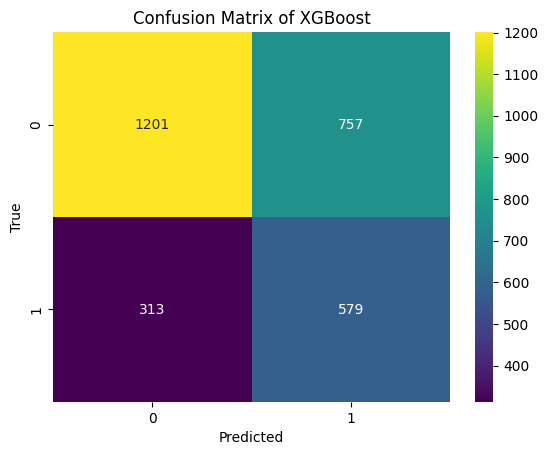

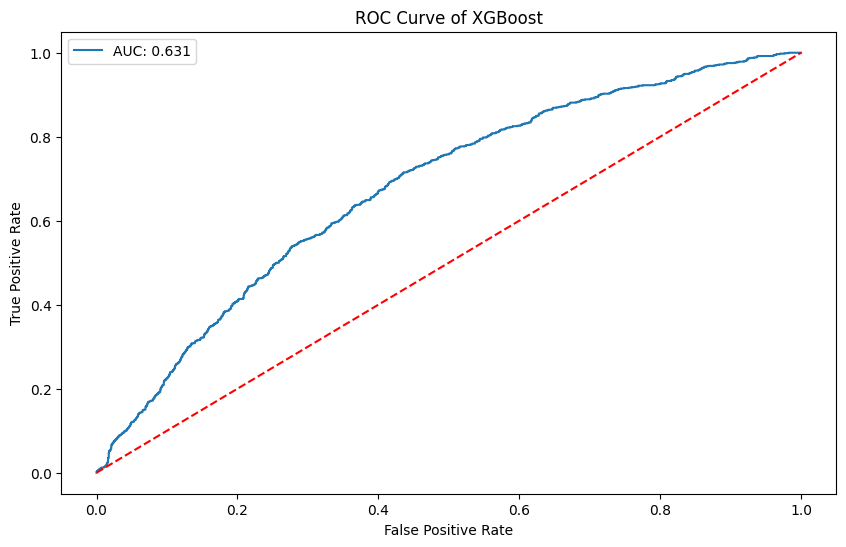

0.6312420700174517

In [26]:
roc_auc_xgb = roc_auc_score(y_test, y_pred)

cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost')
plt.show()

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.legend()
plt.show()
roc_auc_xgb

El modelo parece haber dado muy buenos resultados, sin embargo, sigue prediciendo muchos más 1 de los que debería, RandomFores ha dado mejores métricas

In [27]:
# %pip install optuna-integration

#### MLP

Para el MLP he decicido hacerlo con Keras, y ya que keras no tiene por si mismo una clase de balanced_accuracy, he creado una función para reproducirla

In [13]:
def balanced_accuracy(y_true, y_pred):
    y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
    y_true = tf.cast(y_true, tf.float32)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

    tpr = tf.math.divide_no_nan(tp, tp + fn)  # Tasa de verdaderos positivos
    tnr = tf.math.divide_no_nan(tn, tn + fp)  # Tasa de verdaderos negativos

    balanced_acc = tf.math.divide_no_nan((tpr + tnr), 2.0)
    return balanced_acc

def optimize_nn(trial):
    try:
        neurons_first_layer = trial.suggest_int('neurons_first_layer', 10, 200)
        neurons_second_layer = trial.suggest_int('neurons_second_layer', 10, 200)
        neurons_third_layer = trial.suggest_int('neurons_third_layer', 10, 200)
        add_fourth_layer = trial.suggest_categorical('add_fourth_layer', [True, False])
        if add_fourth_layer:
            neurons_fourth_layer = trial.suggest_int('neurons_fourth_layer', 10, 200)
        else:
            neurons_fourth_layer = 0
        add_fifth_layer = trial.suggest_categorical('add_fifth_layer', [True, False])
        if add_fifth_layer:
            neurons_fifth_layer = trial.suggest_int('neurons_fifth_layer', 10, 200)
        else:
            neurons_fifth_layer = 0

        early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
        loss = trial.suggest_categorical('loss', ['binary_crossentropy'])
        batch_size = trial.suggest_int('batch_size', 32, 128)
        learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
        dropout = trial.suggest_float('dropout', 0.1, 0.3)

        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
        else:
            opt = keras.optimizers.SGD(learning_rate=learning_rate)

        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)

        nn = keras.models.Sequential()
        nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_first_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_second_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_third_layer, activation=activation))
        if add_fourth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fourth_layer, activation=activation))
        if add_fifth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fifth_layer, activation=activation))
        nn.add(keras.layers.Dense(1, activation='sigmoid'))

        nn.compile(optimizer=opt, loss=loss, metrics=[balanced_accuracy])
        
        logging.info(f"Trial {trial.number} - Model created with params: {trial.params}")

        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            X_train_use, y_train_use = X_train_resampled, y_train_resampled
        else:
            X_train_use, y_train_use = X_train, y_train

        nn.fit(X_train_use, y_train_use, validation_data=(X_val, y_val), batch_size=batch_size,
               epochs=50, callbacks=[early_stopping], verbose=0)

        y_pred = nn.predict(X_val)
        y_pred = np.round(y_pred)
        del nn
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [14]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn.db', load_if_exists=True, study_name='Neural Network BAS', pruner=pruner)

study.optimize(optimize_nn, n_trials=200, gc_after_trial=True)

best_nn = study.best_params

joblib.dump(study, 'optuna_study_nn.pkl')

best_nn

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
90/90 ━━━━━━━━━━━━

{'neurons_first_layer': 55,
 'neurons_second_layer': 95,
 'neurons_third_layer': 73,
 'add_fourth_layer': False,
 'add_fifth_layer': True,
 'neurons_fifth_layer': 165,
 'activation': 'tanh',
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'batch_size': 120,
 'learning_rate': 0.0063530351008903386,
 'dropout': 0.16473386509073074,
 'use_resampled': True}

Veo cuál ha sido el mejor valor

In [15]:
study.best_value

0.6425488426706096

In [16]:
study = optuna.load_study(study_name='Neural Network BAS', storage='sqlite:///optuna_study_nn.db')

best_nn = study.best_params

best_nn

{'neurons_first_layer': 55,
 'neurons_second_layer': 95,
 'neurons_third_layer': 73,
 'add_fourth_layer': False,
 'add_fifth_layer': True,
 'neurons_fifth_layer': 165,
 'activation': 'tanh',
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'batch_size': 120,
 'learning_rate': 0.0063530351008903386,
 'dropout': 0.16473386509073074,
 'use_resampled': True}

Pinto los gráficos de los trials

In [17]:
optuna.visualization.plot_optimization_history(study)

In [18]:
optuna.visualization.plot_param_importances(study)

In [19]:
optuna.visualization.plot_slice(study)

Y creo y evalúo el modelo final

In [20]:
best_nn = study.best_params
use_resampled = best_nn.pop('use_resampled')
add_fourth_layer = best_nn.pop('add_fourth_layer')
add_fifth_layer = best_nn.pop('add_fifth_layer')
early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')
activation = best_nn.pop('activation')
optimizer = best_nn.pop('optimizer')
loss = best_nn.pop('loss')
batch_size = best_nn.pop('batch_size')
learning_rate = best_nn.pop('learning_rate')
dropout = best_nn.pop('dropout')

if optimizer == 'adam':
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
elif optimizer == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
else:
    opt = keras.optimizers.SGD(learning_rate=learning_rate)
    
nn = keras.models.Sequential()
nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
nn.add(keras.layers.Dropout(dropout))
nn.add(keras.layers.Dense(best_nn['neurons_first_layer'], activation=activation))
nn.add(keras.layers.Dropout(dropout))
nn.add(keras.layers.Dense(best_nn['neurons_second_layer'], activation=activation))
nn.add(keras.layers.Dropout(dropout))
nn.add(keras.layers.Dense(best_nn['neurons_third_layer'], activation=activation))
if add_fourth_layer:
    nn.add(keras.layers.Dropout(dropout))
    nn.add(keras.layers.Dense(best_nn['neurons_fourth_layer'], activation=activation))
if add_fifth_layer:
    nn.add(keras.layers.Dropout(dropout))
    nn.add(keras.layers.Dense(best_nn['neurons_fifth_layer'], activation=activation))
nn.add(keras.layers.Dense(1, activation='sigmoid'))

nn.compile(optimizer=opt, loss=loss, metrics=[balanced_accuracy])

if use_resampled:
    nn.fit(X_train_resampled, y_train_resampled,
           validation_data=(X_val, y_val),
           batch_size=batch_size, epochs=50,
           callbacks=[early_stopping],
           verbose=0)
else:
    nn.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           batch_size=batch_size, epochs=50,
           callbacks=[early_stopping],
           verbose=0)
    
y_pred = nn.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
              precision    recall  f1-score   support

           0       0.80      0.54      0.65      1958
           1       0.41      0.71      0.52       892

    accuracy                           0.59      2850
   macro avg       0.61      0.62      0.58      2850
weighted avg       0.68      0.59      0.61      2850



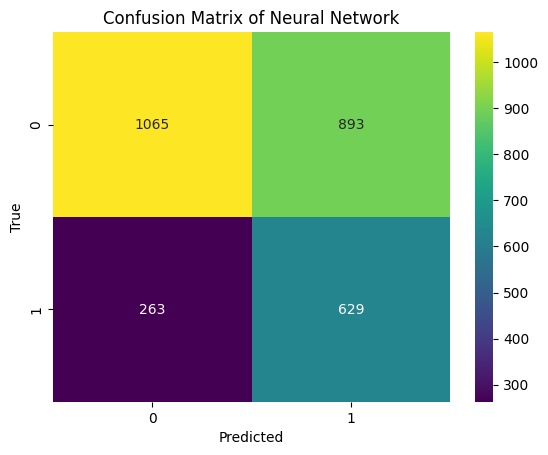

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step


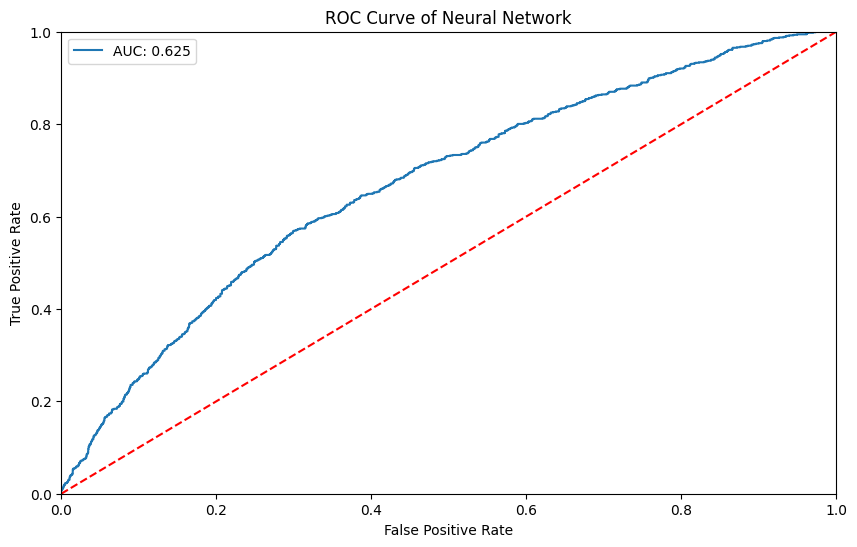

In [21]:
roc_auc_nn = roc_auc_score(y_test, y_pred)

cm_nn = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nn, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network')
plt.show()

roc_auc_nn

# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, nn.predict(X_test))
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network')
plt.legend()
plt.show()

Definitivamente el que más falsos positivos ha predecido, por ello, no es nada buen modelo para este problema, quizá con más datos sería distinto, dado que son muy pocos datos para una red neuronal

## Clustering

Leo de nuevo el dataset solo imputado, ya que quiero eliminar los nulos de cada cluster por separado, según lo que creo, puede que haya algún punto que no sea un outlier en un clúster pero sí en el dataset general y viceversa

In [22]:
df_imputed = pd.read_csv('./caso_final_small_20k_con_mes_imputed.csv')

Para la creación de los clústeres, he decidido usar <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html#hdbscan">HDBSCAN</a> ya que lo considero más potente por varios motivos:
1. No requiere especificar el número de clusters sino que encuentra el número de clústeres automáticamente basado en la densidad
2. Detecta automáticamente los outliers que no pertenecen a ningún cluster
3. Puede encontrar formas de clúster más complejas

Encuentro el mejor parámetro para HDBSCAN que es el tamaño mínimo de clúster

In [23]:
X = df_imputed.drop(columns=['TARGET'])

min_cluster_size_range = range(5, 51, 5)
davies_bouldin = []
silhouette = []
calinski_harabasz = []

for min_cluster_size in min_cluster_size_range:
    clusterer = HDBSCAN(min_cluster_size=min_cluster_size)
    cluster_labels = clusterer.fit_predict(X)
    
    if len(set(cluster_labels)) > 1:
        db_score = davies_bouldin_score(X, cluster_labels)
        davies_bouldin.append(db_score)
        
        sil_score = silhouette_score(X, cluster_labels)
        silhouette.append(sil_score)
        
        ch_score = calinski_harabasz_score(X, cluster_labels)
        calinski_harabasz.append(ch_score)
    else:
        davies_bouldin.append(np.nan)
        silhouette.append(np.nan)
        calinski_harabasz.append(np.nan)

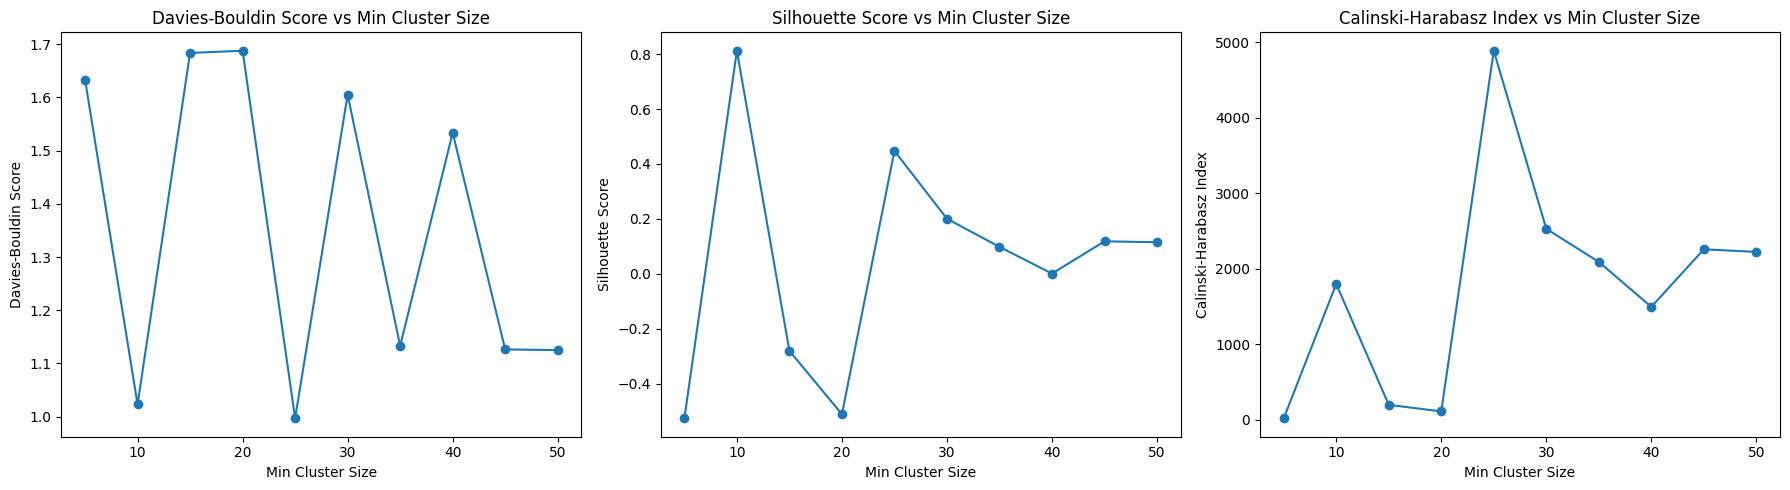

In [24]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(min_cluster_size_range, davies_bouldin, marker='o')
plt.xlabel('Min Cluster Size')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs Min Cluster Size')

plt.subplot(1, 3, 2)
plt.plot(min_cluster_size_range, silhouette, marker='o')
plt.xlabel('Min Cluster Size')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Min Cluster Size')

plt.subplot(1, 3, 3)
plt.plot(min_cluster_size_range, calinski_harabasz, marker='o')
plt.xlabel('Min Cluster Size')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs Min Cluster Size')

plt.tight_layout()
plt.show()

Veo que es 30, por lo que lo hago de esa manera y hago los clusters correspondientes

In [25]:
X = df_imputed.drop(columns=['TARGET'])

clusterer = HDBSCAN(min_cluster_size=30)
cluster_labels = clusterer.fit_predict(X)

Saco el número de clusteres predicho

In [26]:
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Número de clusters: {num_clusters}")

Número de clusters: 3


Y divido el dataset en esos clústeres

In [27]:
df_imputed['Cluster'] = cluster_labels

In [28]:
df1 = df_imputed[df_imputed['Cluster'] == -1]
df2 = df_imputed[df_imputed['Cluster'] != -1]

In [29]:
df1.drop(columns=['Cluster'], inplace=True)
df2.drop(columns=['Cluster'], inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11080\3872977471.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11080\3872977471.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
df1.shape, df2.shape

((6382, 17), (13618, 17))

Trato cada cluster por separado como he hecho antes

In [31]:
X1 = df1.drop(columns=['TARGET'])
X2 = df2.drop(columns=['TARGET'])
y1 = df1['TARGET']
y2 = df2['TARGET']

In [32]:
mes_1_sin = np.sin(2 * np.pi * X1['MES_MES'] / 12).values.reshape(-1, 1)
mes_1_cos = np.cos(2 * np.pi * X1['MES_MES'] / 12).values.reshape(-1, 1)

X1['MES_SIN'] = mes_1_sin
X1['MES_COS'] = mes_1_cos
X1 = X1.drop(['MES_MES'], axis=1)

mes_2_sin = np.sin(2 * np.pi * X2['MES_MES'] / 12).values.reshape(-1, 1)
mes_2_cos = np.cos(2 * np.pi * X2['MES_MES'] / 12).values.reshape(-1, 1)

X2['MES_SIN'] = mes_2_sin
X2['MES_COS'] = mes_2_cos
X2 = X2.drop(['MES_MES'], axis=1)

In [33]:
X1 = X1.values
X2 = X2.values
y1 = y1.values.reshape(-1, 1)
y2 = y2.values.reshape(-1, 1)

In [34]:
type(X1), type(X2), type(y1), type(y2)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

Parto y escalo los clusteres como he hecho antes

In [35]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1, shuffle=True)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2, shuffle=True)

In [36]:
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

In [37]:
smote = SMOTE(random_state=42)
X_train1_resampled, y_train1_resampled = smote.fit_resample(X_train1_scaled.copy(), y_train1.copy())
X_train2_resampled, y_train2_resampled = smote.fit_resample(X_train2_scaled.copy(), y_train2.copy())

In [38]:
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1_scaled, y_test1, test_size=0.5, random_state=42, stratify=y_test1, shuffle=True)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2_scaled, y_test2, test_size=0.5, random_state=42, stratify=y_test2, shuffle=True)

## Entrenamiento de modelos (Post-clustering)

#### LogisticRegression

In [39]:
def optimize_lr(trial, X_train, y_train, X_val, y_val, X_train_resampled, y_train_resampled):
    try:
        C = trial.suggest_float('C', 1e-10, 1e10, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
        if penalty == 'elasticnet':
            l1_ratio = trial.suggest_float('l1_ratio', 0, 1)
        else:
            l1_ratio = None
        lr = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=10000, l1_ratio=l1_ratio)
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            lr.fit(X_train_resampled, y_train_resampled)
        else:
            lr.fit(X_train, y_train)
        y_pred = lr.predict(X_val)
        del lr
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f'Error in Logistic Regression optimization: {e}')
        return float('-inf')

In [40]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr_1.db', load_if_exists=True, study_name='Logistic Regression BAS 1', pruner=pruner)
study.optimize(lambda trial: optimize_lr(trial, X_train1_scaled, y_train1, X_val1, y_val1, X_train1_resampled, y_train1_resampled), n_trials=300, gc_after_trial=True)

best_lr1 = study.best_params
best_lr1

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

ERROR:root:Error in Logistic Regression optimization: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
ERROR:root:Error in Logistic Regression optimization: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.
ERROR:root:Error in Logistic Regression optimization: Solver sag supports only 'l2' or None penalties, got elasticnet penalty.
ERROR:root:Error in Logistic Regression optimization: Solver newton-cholesky su

{'C': 0.0007778015280102137,
 'penalty': 'l2',
 'solver': 'liblinear',
 'use_resampled': True}

In [41]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_lr_2.db', load_if_exists=True, study_name='Logistic Regression BAS 2', pruner=pruner)
study.optimize(lambda trial: optimize_lr(trial, X_train2_scaled, y_train2, X_val2, y_val2, X_train2_resampled, y_train2_resampled), n_trials=300, gc_after_trial=True)

best_lr2 = study.best_params
best_lr2

d:\Máster\M4. Aprendizaje automático\Pr-cticaFinalML2024\.venv\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

ERROR:root:Error in Logistic Regression optimization: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.
ERROR:root:Error in Logistic Regression optimization: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.
ERROR:root:Error in Logistic Regression optimization: Solver newton-cg supports only 'l2' or None penalties, got l1 penalty.
ERROR:root:Error in Logistic Regression optimization: Solver newton-cg supports only 'l2' or None penalties, got elasticnet penalty.
ERROR:root:Error in Logistic Regression optimization: Solver newton-cholesky supports only 'l2' or None penalties, got elasticnet penalty.
ERROR:root:Error in Logistic Regression optimization: Solver sag supports only '

{'C': 0.008664078996654053,
 'penalty': 'elasticnet',
 'solver': 'saga',
 'l1_ratio': 0.8664433069094519,
 'use_resampled': True}

In [42]:
study = optuna.load_study(study_name='Logistic Regression BAS 1', storage='sqlite:///optuna_study_lr_1.db')
best_lr1 = study.best_params
use_resampled = best_lr1.pop('use_resampled')
lr1 = LogisticRegression(**best_lr1, random_state=42, max_iter=10000)
if use_resampled:
    lr1.fit(X_train1_resampled, y_train1_resampled)
else:
    lr1.fit(X_train1_scaled, y_train1)
y_pred1 = lr1.predict(X_test1)
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       548
           1       0.48      0.52      0.50       409

    accuracy                           0.55       957
   macro avg       0.55      0.55      0.55       957
weighted avg       0.56      0.55      0.55       957



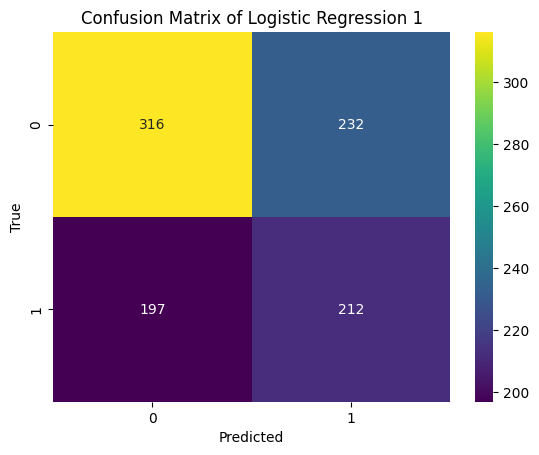

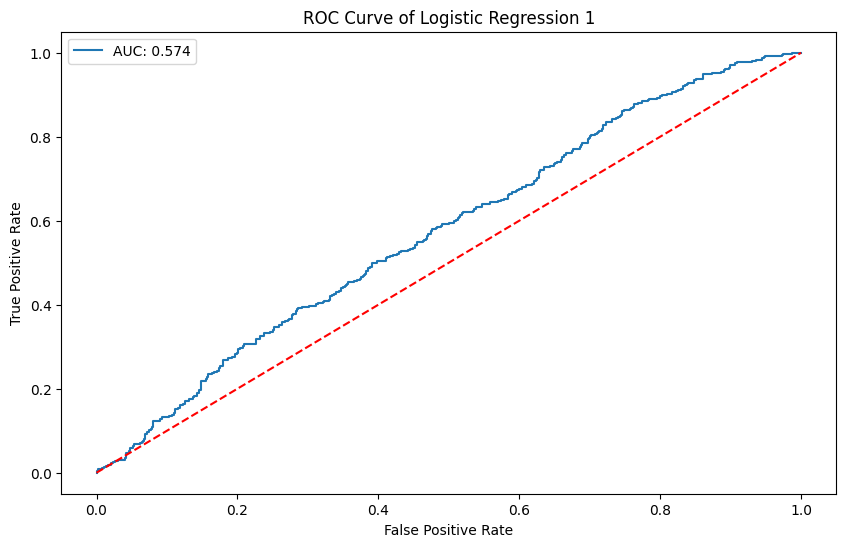

In [43]:
roc_auc_lr1 = roc_auc_score(y_test1, lr1.predict_proba(X_test1)[:, 1])
roc_auc_lr1

cm_lr1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm_lr1, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression 1')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test1, lr1.predict_proba(X_test1)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr1:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression 1')
plt.legend()
plt.show()

In [44]:
study = optuna.load_study(study_name='Logistic Regression BAS 2', storage='sqlite:///optuna_study_lr_2.db')
best_lr2 = study.best_params
use_resampled = best_lr2.pop('use_resampled')
lr2 = LogisticRegression(**best_lr2, random_state=42, max_iter=10000)
if use_resampled:
    lr2.fit(X_train2_resampled, y_train2_resampled)
else:
    lr2.fit(X_train2_scaled, y_train2)
y_pred2 = lr2.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1519
           1       0.36      0.63      0.46       524

    accuracy                           0.62      2043
   macro avg       0.59      0.62      0.58      2043
weighted avg       0.71      0.62      0.64      2043



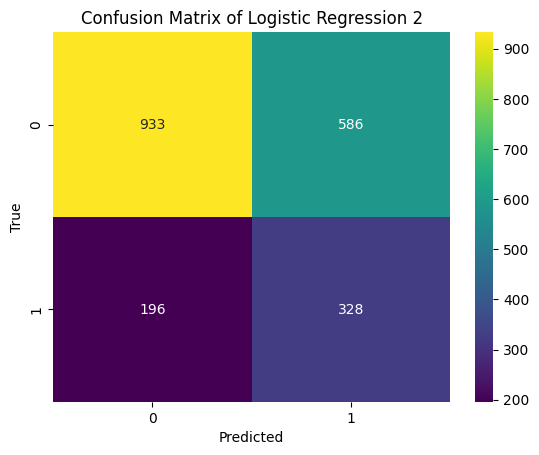

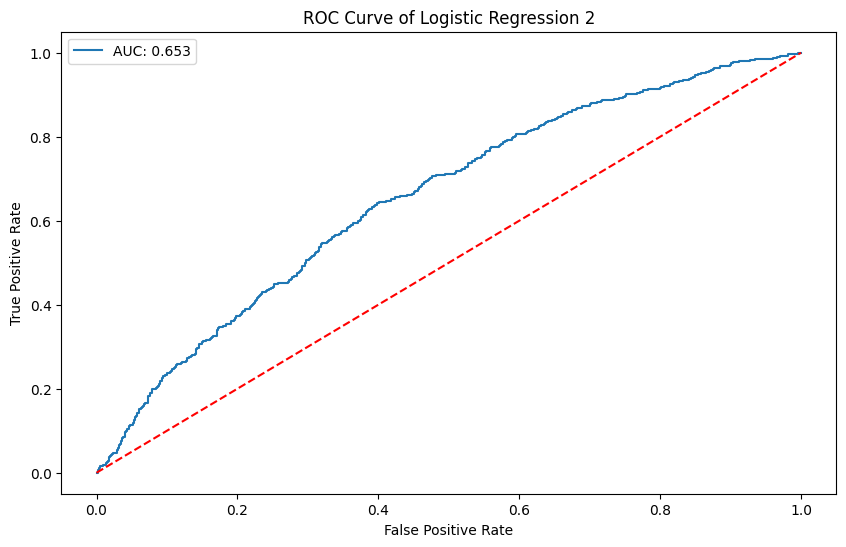

In [45]:
roc_auc_lr2 = roc_auc_score(y_test2, lr2.predict_proba(X_test2)[:, 1])
roc_auc_lr2

cm_lr2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm_lr2, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Logistic Regression 2')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test2, lr2.predict_proba(X_test2)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_lr2:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression 2')
plt.legend()
plt.show()

#### RandomForest

In [46]:
def optimize_random_forest(trial, X_train, y_train, X_val, y_val, X_train_resampled, y_train_resampled):
    try:
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 1, 50)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        
        class_weight_option = trial.suggest_int('class_weight', 0, 5)
        
        # Asignar pesos según el valor entero seleccionado
        if class_weight_option == 0:
            class_weight = None
        elif class_weight_option == 1:
            class_weight = 'balanced'
        else:
            class_weight = {0: 1, 1: class_weight_option}
        
        rf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf, 
            random_state=42, 
            criterion=criterion, 
            max_features=max_features, 
            n_jobs=-1,
            class_weight=class_weight
        )
        
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            rf.fit(X_train_resampled, y_train_resampled.ravel())
        else:
            rf.fit(X_train, y_train.ravel())

        y_pred = rf.predict(X_val)
        del rf
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [47]:
pruner = optuna.pruners.SuccessiveHalvingPruner(min_resource=1, reduction_factor=4, min_early_stopping_rate=0)

In [48]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf1.db', load_if_exists=True, study_name='RandomForest BAS 1', pruner=pruner)

study.optimize(lambda trial: optimize_random_forest(trial, X_train1, y_train1, X_val1, y_val1, X_train1_resampled, y_train1_resampled), n_trials=200, gc_after_trial=True)

best_rf1 = study.best_params

joblib.dump(study, 'optuna_study_rf1.pkl')

best_rf1

{'n_estimators': 794,
 'max_depth': 43,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'criterion': 'entropy',
 'max_features': 'log2',
 'class_weight': 1,
 'use_resampled': True}

In [49]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_rf2.db', load_if_exists=True, study_name='RandomForest BAS 2', pruner=pruner)

study.optimize(lambda trial: optimize_random_forest(trial, X_train2, y_train2, X_val2, y_val2, X_train2_resampled, y_train2_resampled), n_trials=200, gc_after_trial=True)

best_rf2 = study.best_params

joblib.dump(study, 'optuna_study_rf2.pkl')

best_rf2

{'n_estimators': 523,
 'max_depth': 23,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'criterion': 'gini',
 'max_features': 'log2',
 'class_weight': 2,
 'use_resampled': True}

In [50]:
study = optuna.load_study(study_name='RandomForest BAS 1', storage='sqlite:///optuna_study_rf1.db')
best_rf1 = study.best_params
class_weight_option = best_rf1['class_weight']
use_resampled = best_rf1['use_resampled']
if class_weight_option == 0:
    class_weight = None
elif class_weight_option == 1:
    class_weight = 'balanced'
else:
    class_weight = {0: 1, 1: class_weight_option}
    
best_rf1.pop('class_weight')
best_rf1.pop('use_resampled')

rf1 = RandomForestClassifier(**best_rf1,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

if use_resampled:
    rf1.fit(X_train1_resampled, y_train1_resampled.ravel())
else:
    rf1.fit(X_train1, y_train1.ravel())
    
y_pred1 = rf1.predict(X_test1)

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62       548
           1       0.50      0.50      0.50       409

    accuracy                           0.57       957
   macro avg       0.56      0.56      0.56       957
weighted avg       0.57      0.57      0.57       957



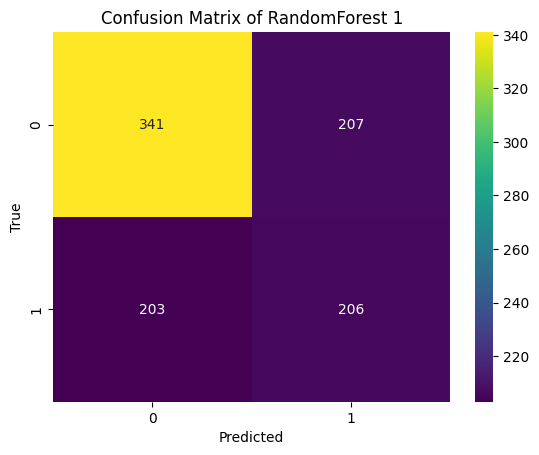

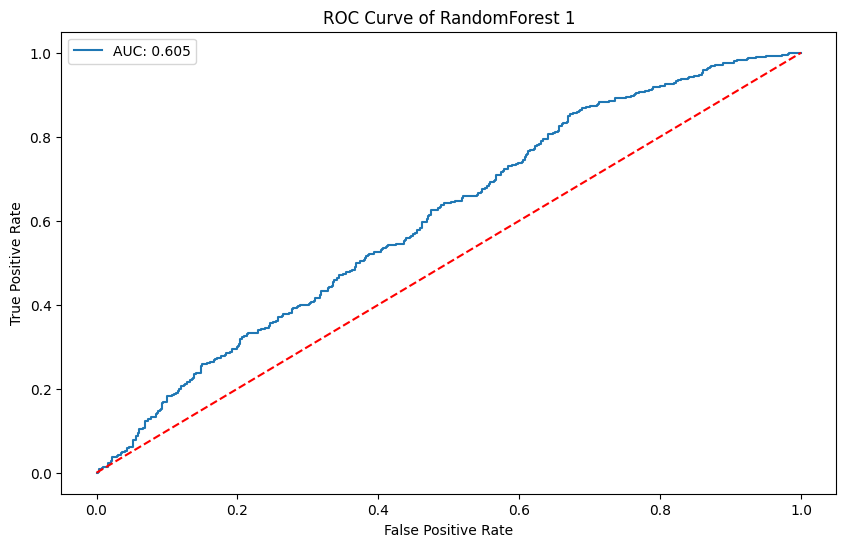

In [51]:
roc_auc_rf1 = roc_auc_score(y_test1, rf1.predict_proba(X_test1)[:, 1])

cm_rf1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm_rf1, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of RandomForest 1')
plt.show()

roc_auc_rf1

fpr, tpr, thresholds = roc_curve(y_test1, rf1.predict_proba(X_test1)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf1:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve of RandomForest 1')
plt.legend()
plt.show()

In [52]:
study = optuna.load_study(study_name='RandomForest BAS 2', storage='sqlite:///optuna_study_rf2.db')
best_rf2 = study.best_params
class_weight_option = best_rf2['class_weight']
use_resampled = best_rf2['use_resampled']
if class_weight_option == 0:
    class_weight = None
elif class_weight_option == 1:
    class_weight = 'balanced'
else:
    class_weight = {0: 1, 1: class_weight_option}
    
best_rf2.pop('class_weight')
best_rf2.pop('use_resampled')

rf2 = RandomForestClassifier(**best_rf2,
                            class_weight=class_weight,
                            random_state=42,
                            n_jobs=-1)

if use_resampled:
    rf2.fit(X_train2_resampled, y_train2_resampled.ravel())
else:
    rf2.fit(X_train2, y_train2.ravel())
    
y_pred2 = rf2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61      1519
           1       0.33      0.73      0.45       524

    accuracy                           0.54      2043
   macro avg       0.58      0.60      0.53      2043
weighted avg       0.71      0.54      0.57      2043



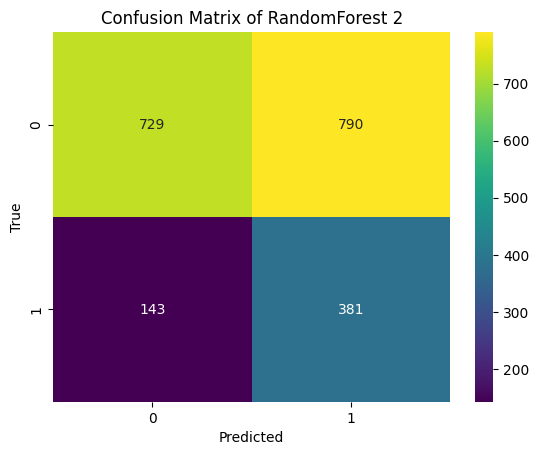

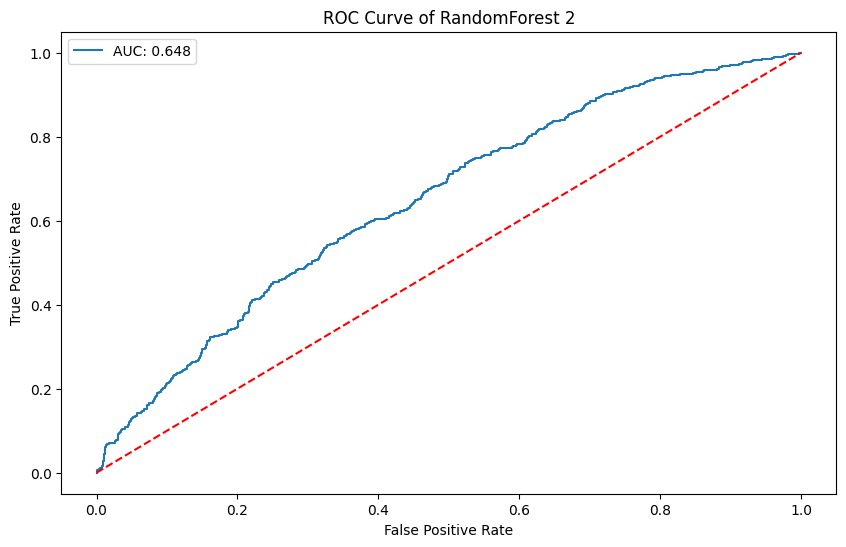

In [53]:
roc_auc_rf2 = roc_auc_score(y_test2, rf2.predict_proba(X_test2)[:, 1])

cm_rf2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm_rf2, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of RandomForest 2')
plt.show()

roc_auc_rf2

fpr, tpr, thresholds = roc_curve(y_test2, rf2.predict_proba(X_test2)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_rf2:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve of RandomForest 2')
plt.legend()

#### XGBoost

In [54]:
def optimize_xgboost(trial, X_train, y_train, X_val, y_val, X_train_resampled, y_train_resampled):
    try:
        # scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
        n_estimators = trial.suggest_int('n_estimators', 100, 600)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])  # Eliminado 'gblinear' para reducir complejidad
        subsample = trial.suggest_float('subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
        min_child_weight = trial.suggest_int('min_child_weight', 1, 6)
        gamma = trial.suggest_float('gamma', 0, 5)
        reg_alpha = trial.suggest_float('reg_alpha', 1e-5, 20, log=True)
        reg_lambda = trial.suggest_float('reg_lambda', 1e-5, 10, log=True)
        # scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 20)
        
        xgb_model = xgb.XGBClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            learning_rate=learning_rate,
            booster=booster, 
            subsample=subsample, 
            colsample_bytree=colsample_bytree,
            min_child_weight=min_child_weight, 
            gamma=gamma,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            # scale_pos_weight=scale_pos_weight,
            random_state=42,
            nthread=8
        )

        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            xgb_model.fit(X_train_resampled, y_train_resampled)
        else:
            xgb_model.fit(X_train, y_train)
            
        y_pred = xgb_model.predict(X_val)
        del xgb_model
        gc.collect()
        return balanced_accuracy_score(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [55]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb1.db', load_if_exists=True, study_name='XGBoost BAS 1', pruner=pruner)

study.optimize(lambda trial: optimize_xgboost(trial, X_train1_scaled, y_train1, X_val1, y_val1, X_train1_resampled, y_train1_resampled), n_trials=100, gc_after_trial=True)

best_xgb1 = study.best_params

joblib.dump(study, 'optuna_study_xgb1.pkl')

best_xgb1

{'n_estimators': 275,
 'max_depth': 7,
 'learning_rate': 0.00818084718332079,
 'booster': 'dart',
 'subsample': 0.6518078537212457,
 'colsample_bytree': 0.8870961370558401,
 'min_child_weight': 2,
 'gamma': 0.7928259604602023,
 'reg_alpha': 0.01597296952674958,
 'reg_lambda': 0.00011493112508733069,
 'use_resampled': True}

In [56]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_xgb2.db', load_if_exists=True, study_name='XGBoost BAS 2', pruner=pruner)

study.optimize(lambda trial: optimize_xgboost(trial, X_train2_scaled, y_train2, X_val2, y_val2, X_train2_resampled, y_train2_resampled), n_trials=100, gc_after_trial=True)

best_xgb2 = study.best_params

joblib.dump(study, 'optuna_study_xgb2.pkl')

best_xgb2

{'n_estimators': 293,
 'max_depth': 4,
 'learning_rate': 0.00019199147763569458,
 'booster': 'gbtree',
 'subsample': 0.9857222433662348,
 'colsample_bytree': 0.6260055743761112,
 'min_child_weight': 3,
 'gamma': 3.093394283300102,
 'reg_alpha': 2.637245651227866e-05,
 'reg_lambda': 4.029791261242026,
 'use_resampled': True}

In [57]:
study = optuna.load_study(study_name='XGBoost BAS 1', storage='sqlite:///optuna_study_xgb1.db')
best_xgb1 = study.best_params
use_resampled = best_xgb1.pop('use_resampled')
xgb_model1 = xgb.XGBClassifier(**best_xgb1, random_state=42)
if use_resampled:
    xgb_model1.fit(X_train1_resampled, y_train1_resampled)
else:
    xgb_model1.fit(X_train1_scaled, y_train1)
y_pred1 = xgb_model1.predict(X_test1)

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       548
           1       0.49      0.51      0.50       409

    accuracy                           0.56       957
   macro avg       0.55      0.55      0.55       957
weighted avg       0.56      0.56      0.56       957



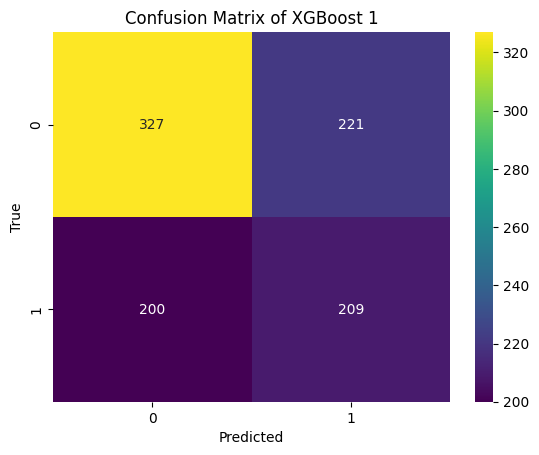

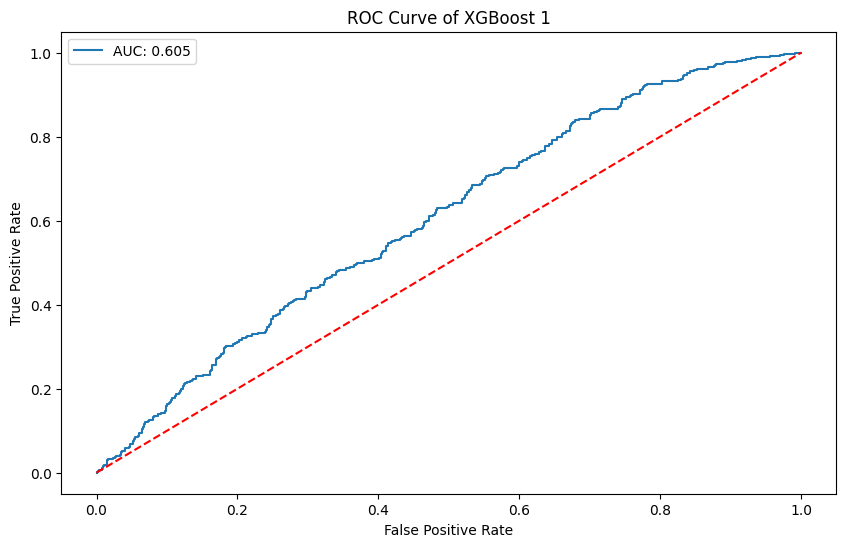

In [58]:
roc_auc_xgb1 = roc_auc_score(y_test1, xgb_model1.predict_proba(X_test1)[:, 1])

cm_xgb1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm_xgb1, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost 1')
plt.show()

roc_auc_xgb1

fpr, tpr, thresholds = roc_curve(y_test1, xgb_model1.predict_proba(X_test1)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb1:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost 1')
plt.legend()
plt.show()

In [59]:
study = optuna.load_study(study_name='XGBoost BAS 2', storage='sqlite:///optuna_study_xgb2.db')
best_xgb2 = study.best_params
use_resampled = best_xgb2.pop('use_resampled')
xgb_model2 = xgb.XGBClassifier(**best_xgb2, random_state=42)
if use_resampled:
    xgb_model2.fit(X_train2_resampled, y_train2_resampled)
else:
    xgb_model2.fit(X_train2_scaled, y_train2)
y_pred2 = xgb_model2.predict(X_test2)

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      1519
           1       0.35      0.59      0.44       524

    accuracy                           0.61      2043
   macro avg       0.58      0.61      0.57      2043
weighted avg       0.70      0.61      0.64      2043



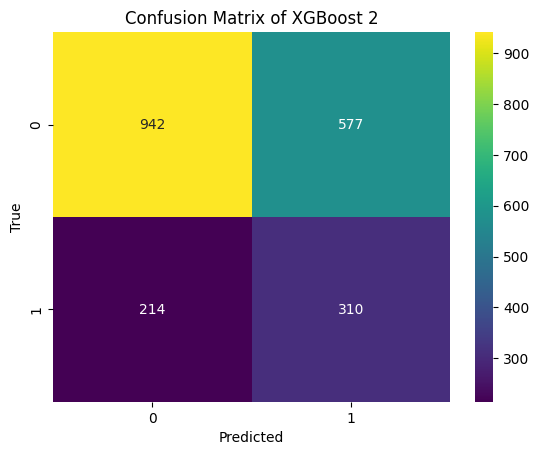

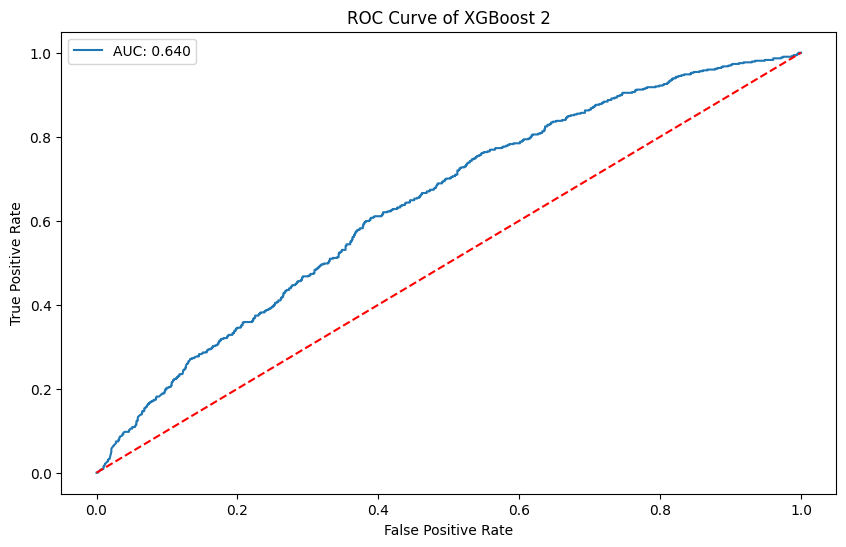

In [60]:
roc_auc_xgb2 = roc_auc_score(y_test2, xgb_model2.predict_proba(X_test2)[:, 1])

cm_xgb2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm_xgb2, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of XGBoost 2')
plt.show()

roc_auc_xgb2

fpr, tpr, thresholds = roc_curve(y_test2, xgb_model2.predict_proba(X_test2)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_xgb2:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of XGBoost 2')
plt.legend()
plt.show()

#### MLP

In [61]:
def balanced_accuracy(y_true, y_pred):
    y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))
    y_true = tf.cast(y_true, tf.float32)

    tp = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32))
    tn = tf.reduce_sum(tf.cast((1 - y_true) * (1 - y_pred), tf.float32))
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, tf.float32))
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), tf.float32))

    tpr = tf.math.divide_no_nan(tp, tp + fn)
    tnr = tf.math.divide_no_nan(tn, tn + fp)

    balanced_acc = tf.math.divide_no_nan((tpr + tnr), 2.0)
    return balanced_acc

def optimize_nn(trial, X_train, y_train, X_val, y_val, X_train_resampled, y_train_resampled):
    try:
        neurons_first_layer = trial.suggest_int('neurons_first_layer', 10, 200)
        neurons_second_layer = trial.suggest_int('neurons_second_layer', 10, 200)
        neurons_third_layer = trial.suggest_int('neurons_third_layer', 10, 200)
        add_fourth_layer = trial.suggest_categorical('add_fourth_layer', [True, False])
        if add_fourth_layer:
            neurons_fourth_layer = trial.suggest_int('neurons_fourth_layer', 10, 200)
        else:
            neurons_fourth_layer = 0
        add_fifth_layer = trial.suggest_categorical('add_fifth_layer', [True, False])
        if add_fifth_layer:
            neurons_fifth_layer = trial.suggest_int('neurons_fifth_layer', 10, 200)
        else:
            neurons_fifth_layer = 0

        early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')
        activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
        optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
        loss = trial.suggest_categorical('loss', ['binary_crossentropy'])
        batch_size = trial.suggest_int('batch_size', 32, 128)
        learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
        dropout = trial.suggest_float('dropout', 0.1, 0.3)

        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'rmsprop':
            opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
        else:
            opt = keras.optimizers.SGD(learning_rate=learning_rate)

        physical_devices = tf.config.list_physical_devices('GPU')
        if len(physical_devices) > 0:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)

        # Crear el modelo
        nn = keras.models.Sequential()
        nn.add(keras.layers.InputLayer(shape=(X_train.shape[1],)))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_first_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_second_layer, activation=activation))
        nn.add(keras.layers.Dropout(dropout))
        nn.add(keras.layers.Dense(neurons_third_layer, activation=activation))
        if add_fourth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fourth_layer, activation=activation))
        if add_fifth_layer:
            nn.add(keras.layers.Dropout(dropout))
            nn.add(keras.layers.Dense(neurons_fifth_layer, activation=activation))
        nn.add(keras.layers.Dense(1, activation='sigmoid'))
        
        nn.compile(optimizer=opt, loss=loss, metrics=[balanced_accuracy])
        
        use_resampled = trial.suggest_categorical('use_resampled', [True, False])
        if use_resampled:
            nn.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), batch_size=batch_size,
                   epochs=900, callbacks=[early_stopping], verbose=0)
        else:
            nn.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size,
                   epochs=900, callbacks=[early_stopping], verbose=0)
            
        y_pred = nn.predict(X_val)
        y_pred = np.round(y_pred)
        del nn
        gc.collect()
        return balanced_accuracy(y_val, y_pred)
    except Exception as e:
        logging.error(f"Optimization error in trial {trial.number}: {e}")
        return float('-inf')

In [62]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn1.db', load_if_exists=True, study_name='Neural Network BAS 1', pruner=pruner)

study.optimize(lambda trial: optimize_nn(trial, X_train1_scaled, y_train1, X_val1, y_val1, X_train1_resampled, y_train1_resampled), n_trials=200, gc_after_trial=True)

best_nn1 = study.best_params

joblib.dump(study, 'optuna_study_nn1.pkl')

best_nn1

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3

{'neurons_first_layer': 35,
 'neurons_second_layer': 23,
 'neurons_third_layer': 31,
 'add_fourth_layer': True,
 'neurons_fourth_layer': 156,
 'add_fifth_layer': False,
 'activation': 'tanh',
 'optimizer': 'rmsprop',
 'loss': 'binary_crossentropy',
 'batch_size': 42,
 'learning_rate': 0.0001557007153611537,
 'dropout': 0.16906559467359464,
 'use_resampled': True}

In [63]:
study = optuna.create_study(direction='maximize', storage='sqlite:///optuna_study_nn2.db', load_if_exists=True, study_name='Neural Network BAS 2', pruner=pruner)

study.optimize(lambda trial: optimize_nn(trial, X_train2_scaled, y_train2, X_val2, y_val2, X_train2_resampled, y_train2_resampled), n_trials=200, gc_after_trial=True)

best_nn2 = study.best_params

joblib.dump(study, 'optuna_study_nn2.pkl')

best_nn2

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 

{'neurons_first_layer': 35,
 'neurons_second_layer': 37,
 'neurons_third_layer': 58,
 'add_fourth_layer': True,
 'neurons_fourth_layer': 41,
 'add_fifth_layer': True,
 'neurons_fifth_layer': 118,
 'activation': 'relu',
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'batch_size': 104,
 'learning_rate': 0.0014539313846428828,
 'dropout': 0.24985335510303763,
 'use_resampled': True}

In [64]:
study = optuna.load_study(study_name='Neural Network BAS 1', storage='sqlite:///optuna_study_nn1.db')
best_nn1 = study.best_params
use_resampled = best_nn1.pop('use_resampled')
nn1 = keras.models.Sequential()
nn1.add(keras.layers.InputLayer(shape=(X_train1_scaled.shape[1],)))
nn1.add(keras.layers.Dropout(best_nn1['dropout']))
nn1.add(keras.layers.Dense(best_nn1['neurons_first_layer'], activation=best_nn1['activation']))
nn1.add(keras.layers.Dropout(best_nn1['dropout']))
nn1.add(keras.layers.Dense(best_nn1['neurons_second_layer'], activation=best_nn1['activation']))
nn1.add(keras.layers.Dropout(best_nn1['dropout']))
nn1.add(keras.layers.Dense(best_nn1['neurons_third_layer'], activation=best_nn1['activation']))
if best_nn1['add_fourth_layer']:
    nn1.add(keras.layers.Dropout(best_nn1['dropout']))
    nn1.add(keras.layers.Dense(best_nn1['neurons_fourth_layer'], activation=best_nn1['activation']))
if best_nn1['add_fifth_layer']:
    nn1.add(keras.layers.Dropout(best_nn1['dropout']))
    nn1.add(keras.layers.Dense(best_nn1['neurons_fifth_layer'], activation=best_nn1['activation']))
nn1.add(keras.layers.Dense(1, activation='sigmoid'))

if best_nn1['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(learning_rate=best_nn1['learning_rate'])
elif best_nn1['optimizer'] == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=best_nn1['learning_rate'])
else:
    opt = keras.optimizers.SGD(learning_rate=best_nn1['learning_rate'])
    
nn1.compile(optimizer=opt, loss=best_nn1['loss'], metrics=[balanced_accuracy])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')

if use_resampled:
    nn1.fit(X_train1_resampled, y_train1_resampled, validation_data=(X_val1, y_val1), batch_size=best_nn1['batch_size'],
            epochs=900, callbacks=[early_stopping], verbose=0)
else:
    nn1.fit(X_train1_scaled, y_train1, validation_data=(X_val1, y_val1), batch_size=best_nn1['batch_size'],
            epochs=900, callbacks=[early_stopping], verbose=0)
    
y_pred1 = nn1.predict(X_test1)
y_pred1 = np.round(y_pred1)

print(classification_report(y_test1, y_pred1))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       548
           1       0.48      0.55      0.51       409

    accuracy                           0.55       957
   macro avg       0.55      0.55      0.55       957
weighted avg       0.56      0.55      0.56       957



30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step


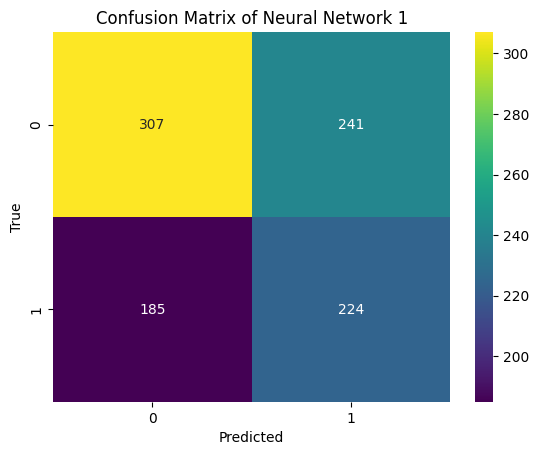

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


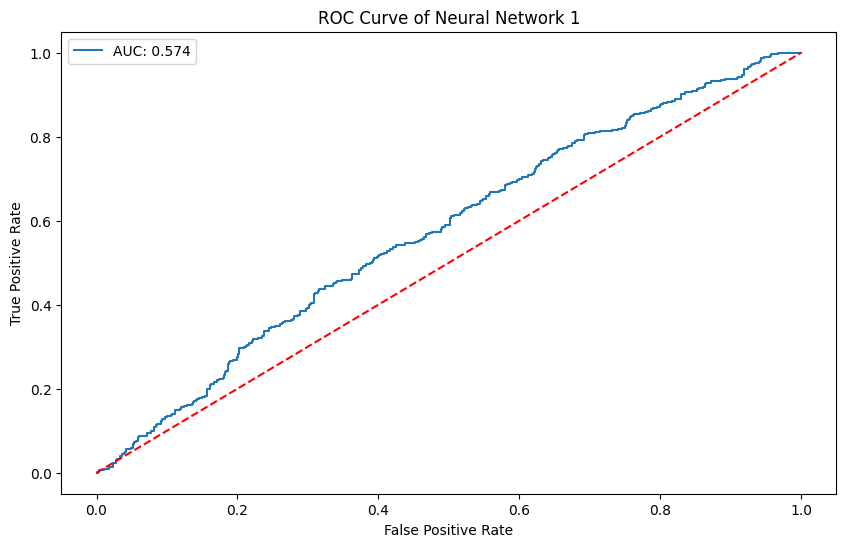

In [65]:
roc_auc_nn1 = roc_auc_score(y_test1, nn1.predict(X_test1))

cm_nn1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm_nn1, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network 1')
plt.show()

roc_auc_nn1

fpr, tpr, thresholds = roc_curve(y_test1, nn1.predict(X_test1))
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn1:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network 1')
plt.legend()
plt.show()

In [66]:
study = optuna.load_study(study_name='Neural Network BAS 2', storage='sqlite:///optuna_study_nn2.db')
best_nn2 = study.best_params
use_resampled = best_nn2.pop('use_resampled')
nn2 = keras.models.Sequential()
nn2.add(keras.layers.InputLayer(shape=(X_train2_scaled.shape[1],)))
nn2.add(keras.layers.Dropout(best_nn2['dropout']))
nn2.add(keras.layers.Dense(best_nn2['neurons_first_layer'], activation=best_nn2['activation']))
nn2.add(keras.layers.Dropout(best_nn2['dropout']))
nn2.add(keras.layers.Dense(best_nn2['neurons_second_layer'], activation=best_nn2['activation']))
nn2.add(keras.layers.Dropout(best_nn2['dropout']))
nn2.add(keras.layers.Dense(best_nn2['neurons_third_layer'], activation=best_nn2['activation']))
if best_nn2['add_fourth_layer']:
    nn2.add(keras.layers.Dropout(best_nn2['dropout']))
    nn2.add(keras.layers.Dense(best_nn2['neurons_fourth_layer'], activation=best_nn2['activation']))
if best_nn2['add_fifth_layer']:
    nn2.add(keras.layers.Dropout(best_nn2['dropout']))
    nn2.add(keras.layers.Dense(best_nn2['neurons_fifth_layer'], activation=best_nn2['activation']))
nn2.add(keras.layers.Dense(1, activation='sigmoid'))

if best_nn2['optimizer'] == 'adam':
    opt = keras.optimizers.Adam(learning_rate=best_nn2['learning_rate'])
elif best_nn2['optimizer'] == 'rmsprop':
    opt = keras.optimizers.RMSprop(learning_rate=best_nn2['learning_rate'])
else:
    opt = keras.optimizers.SGD(learning_rate=best_nn2['learning_rate'])
    
nn2.compile(optimizer=opt, loss=best_nn2['loss'], metrics=[balanced_accuracy])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_balanced_accuracy', patience=20, restore_best_weights=True, mode='max')

if use_resampled:
    nn2.fit(X_train2_resampled, y_train2_resampled, validation_data=(X_val2, y_val2), batch_size=best_nn2['batch_size'],
            epochs=900, callbacks=[early_stopping], verbose=0)
else:
    nn2.fit(X_train2_scaled, y_train2, validation_data=(X_val2, y_val2), batch_size=best_nn2['batch_size'],
            epochs=900, callbacks=[early_stopping], verbose=0)
    
y_pred2 = nn2.predict(X_test2)
y_pred2 = np.round(y_pred2)

print(classification_report(y_test2, y_pred2))

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
              precision    recall  f1-score   support

           0       0.84      0.48      0.61      1519
           1       0.33      0.74      0.46       524

    accuracy                           0.55      2043
   macro avg       0.59      0.61      0.54      2043
weighted avg       0.71      0.55      0.57      2043



64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


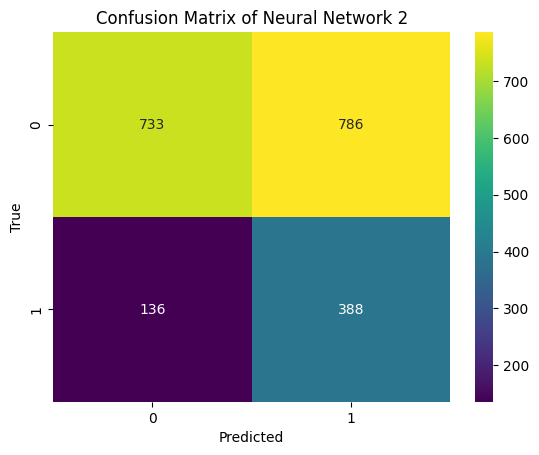

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


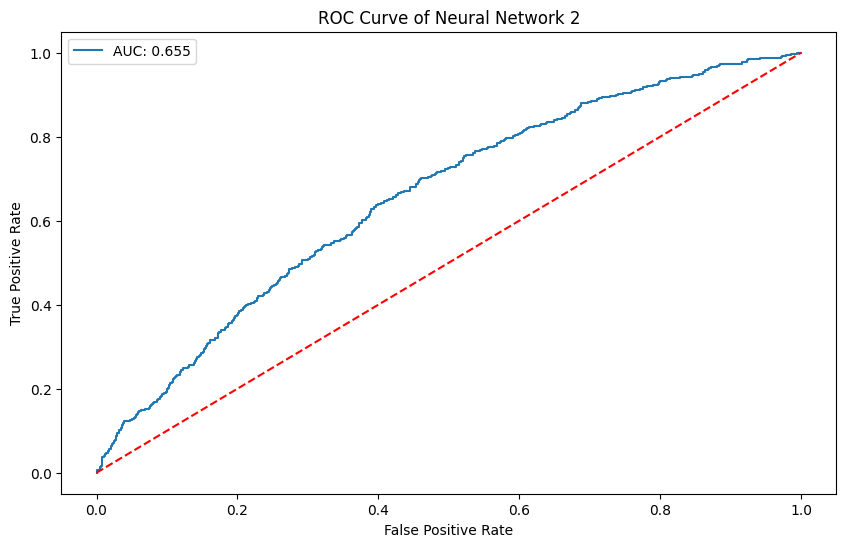

In [67]:
roc_auc_nn2 = roc_auc_score(y_test2, nn2.predict(X_test2))

cm_nn2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm_nn2, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Neural Network 2')
plt.show()

roc_auc_nn2

fpr, tpr, thresholds = roc_curve(y_test2, nn2.predict(X_test2))
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_nn2:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network 2')
plt.legend()
plt.show()

## Conclusión

El error en cuanto a los nulos de hace un par de días no parece haber sido realmente relevante, sin embargo, cambio mi posición en cuanto a qué modelo usar para el clúster 2, ya que la regresión logística parece funcionar bastante bien y es barata por tener un bajo coste computacional, la verdad es que creo que harían falta muchos más datos para sacar unas conclusiones precisas y adecuadas dadas las 36 variables, quizá en mi decisión de eliminar aquellas con más de 1 de correlación haya eliminado alguna con demasiada correlación pero no demasiada causalidad, siempre hay que tener esto en cuenta, pero sin tener más información acerca del problema, es algo difícil. Ahora, si lo que queremos es vender como compañía, quizá me quedaría con XGBoost, es el que menos falsos 0 predice y aunque prediga muchos falsos 1, siempre es mejor ofrecer a un cliente que no compre que no dejar de ofrecer a un cliente que sí que fuera a comprar.